In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
DIR = '/home/sauraj/Desktop/Flappy Bird/Datasets/'

#Load in dataframes 
sarsa_info = pd.read_csv(DIR+'info_df_sarsa.csv')
ql_info = pd.read_csv(DIR+'info_df_qlearning.csv')


sarsa_qtable = pd.read_csv(DIR+'qtable_sarsa.csv')
ql_qtable = pd.read_csv(DIR+'qtable_qlearning.csv')

### Reward Plot

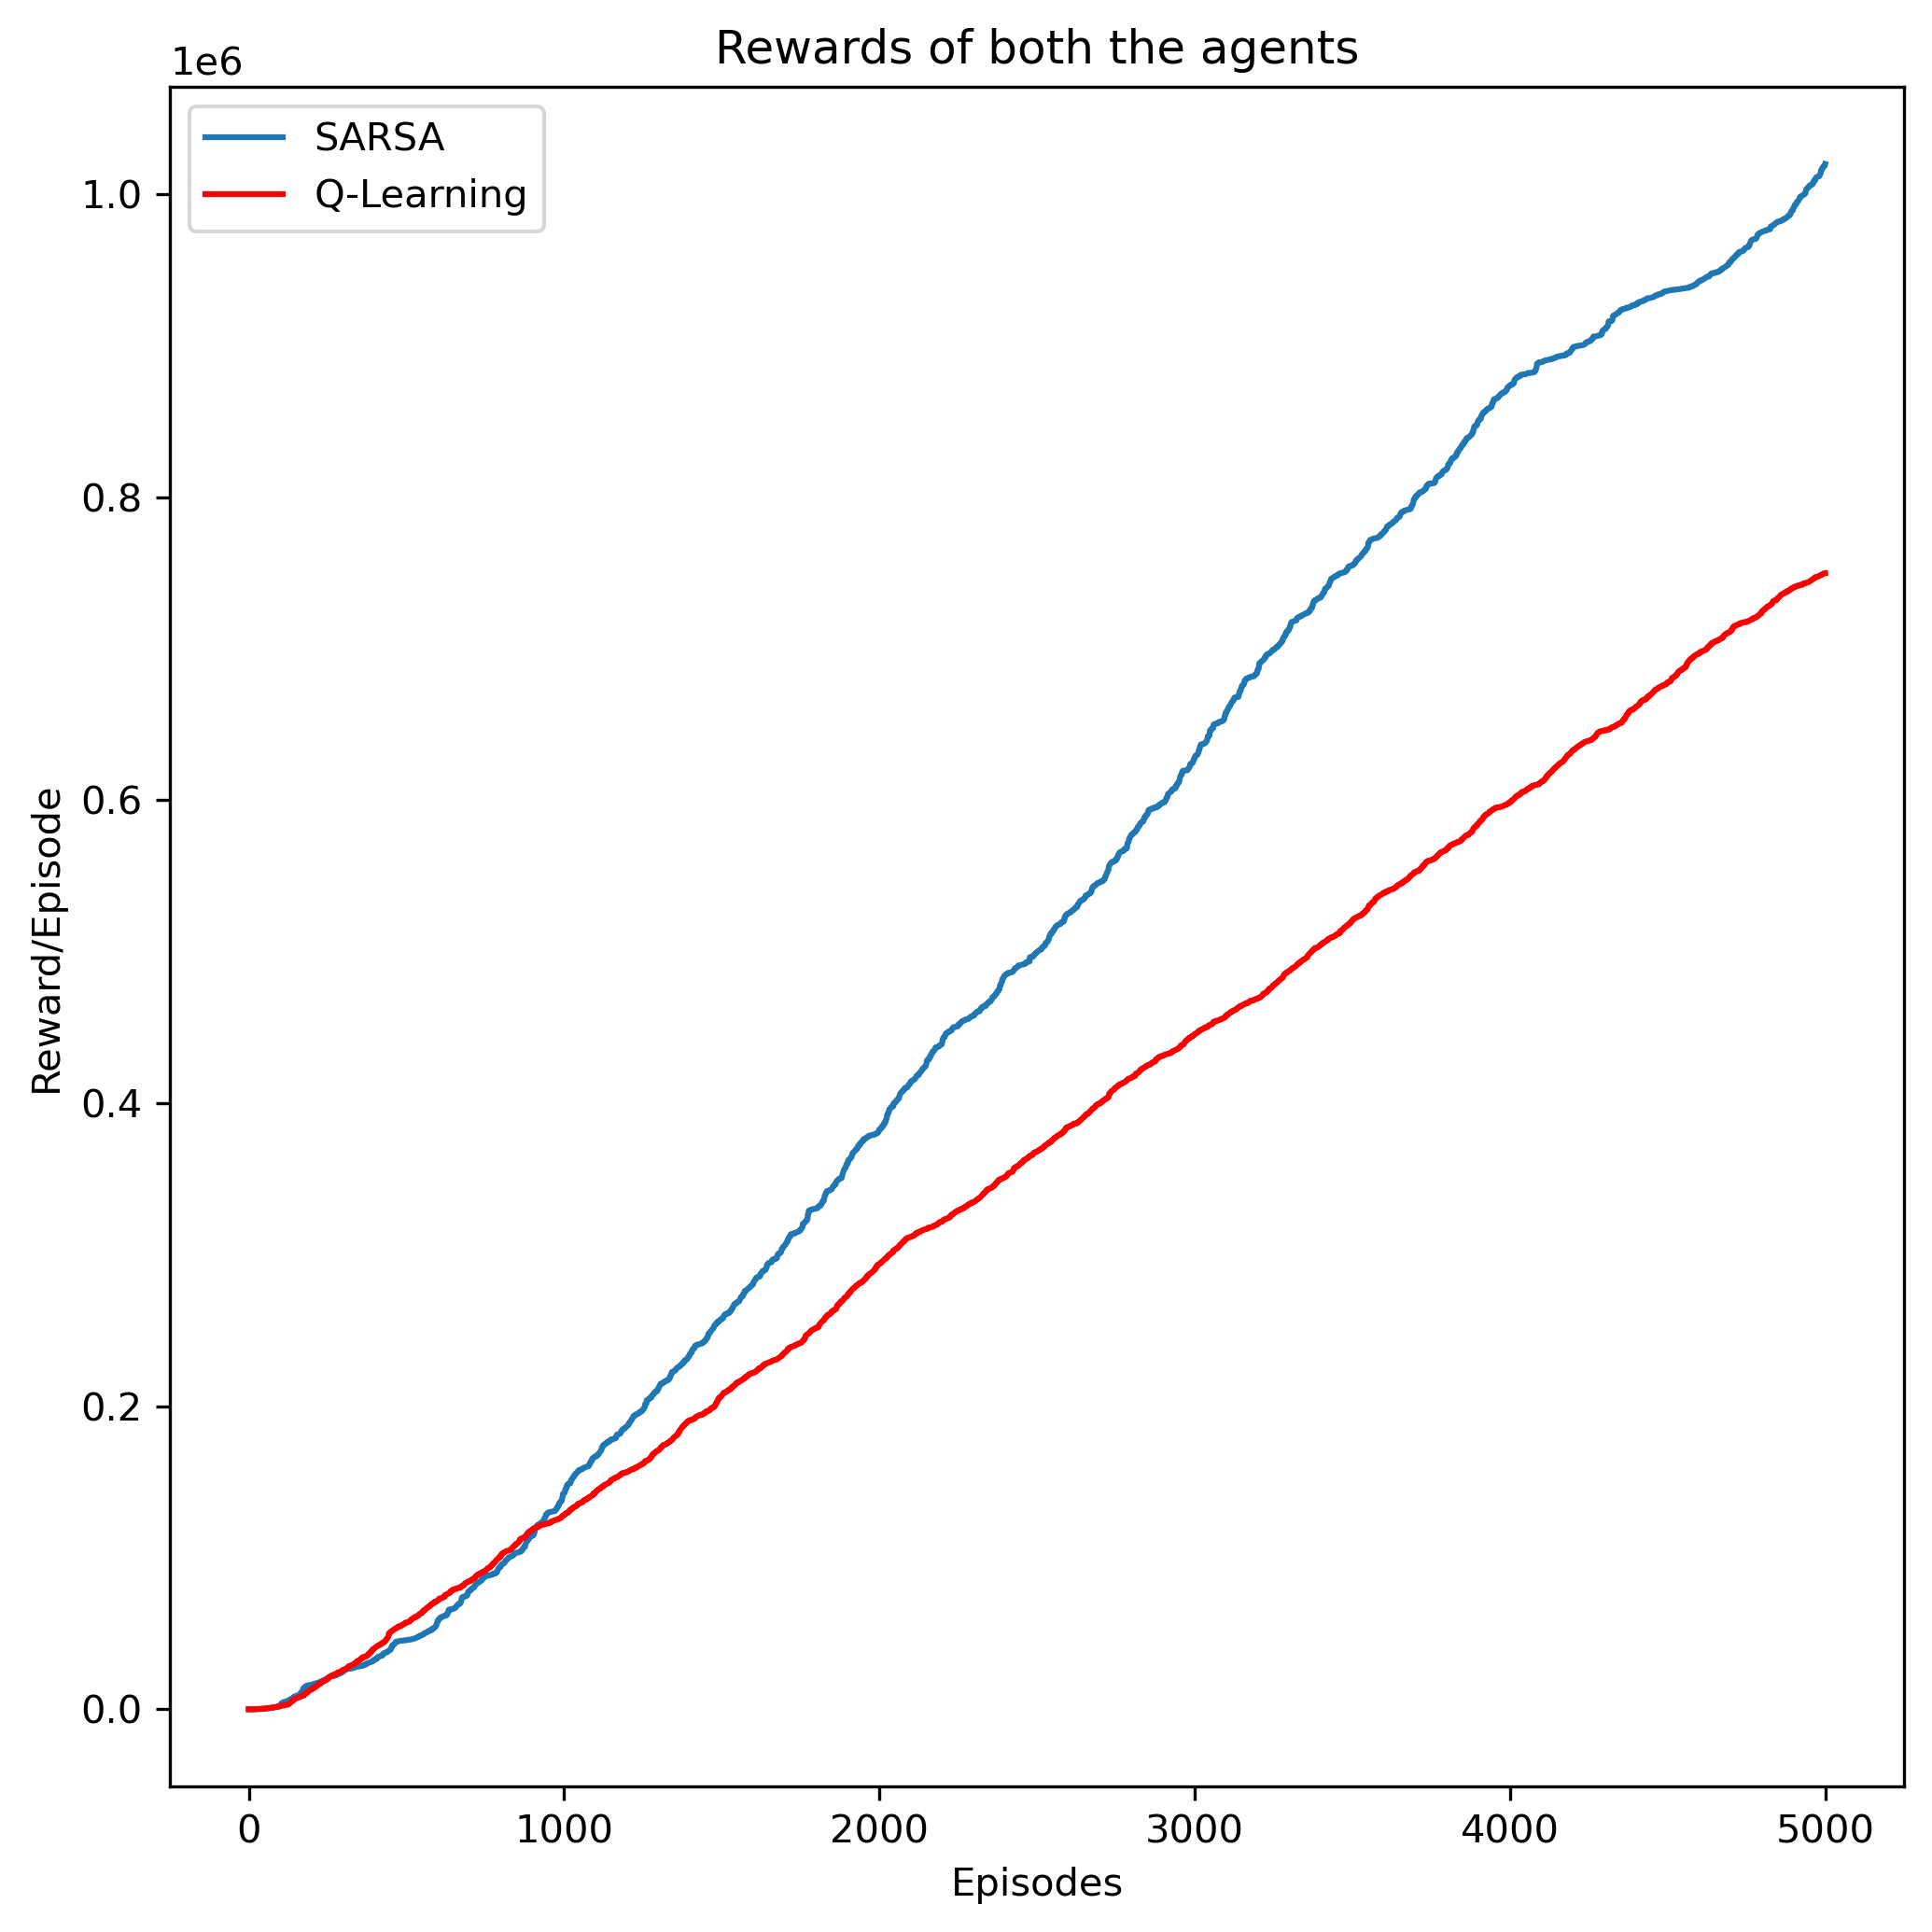

In [11]:
plt.figure(figsize=(7,7),dpi=300)
sarsa_info['Rewards'].expanding(1).sum().plot()
ql_info['Rewards'].expanding(1).sum().plot(color='red')
plt.ylabel('Reward/Episode')
plt.xlabel('Episodes')
plt.title('Rewards of both the agents')
plt.legend(['SARSA','Q-Learning'])
plt.tight_layout()
# plt.savefig('reward_plot.png')

### Average Reward Plot

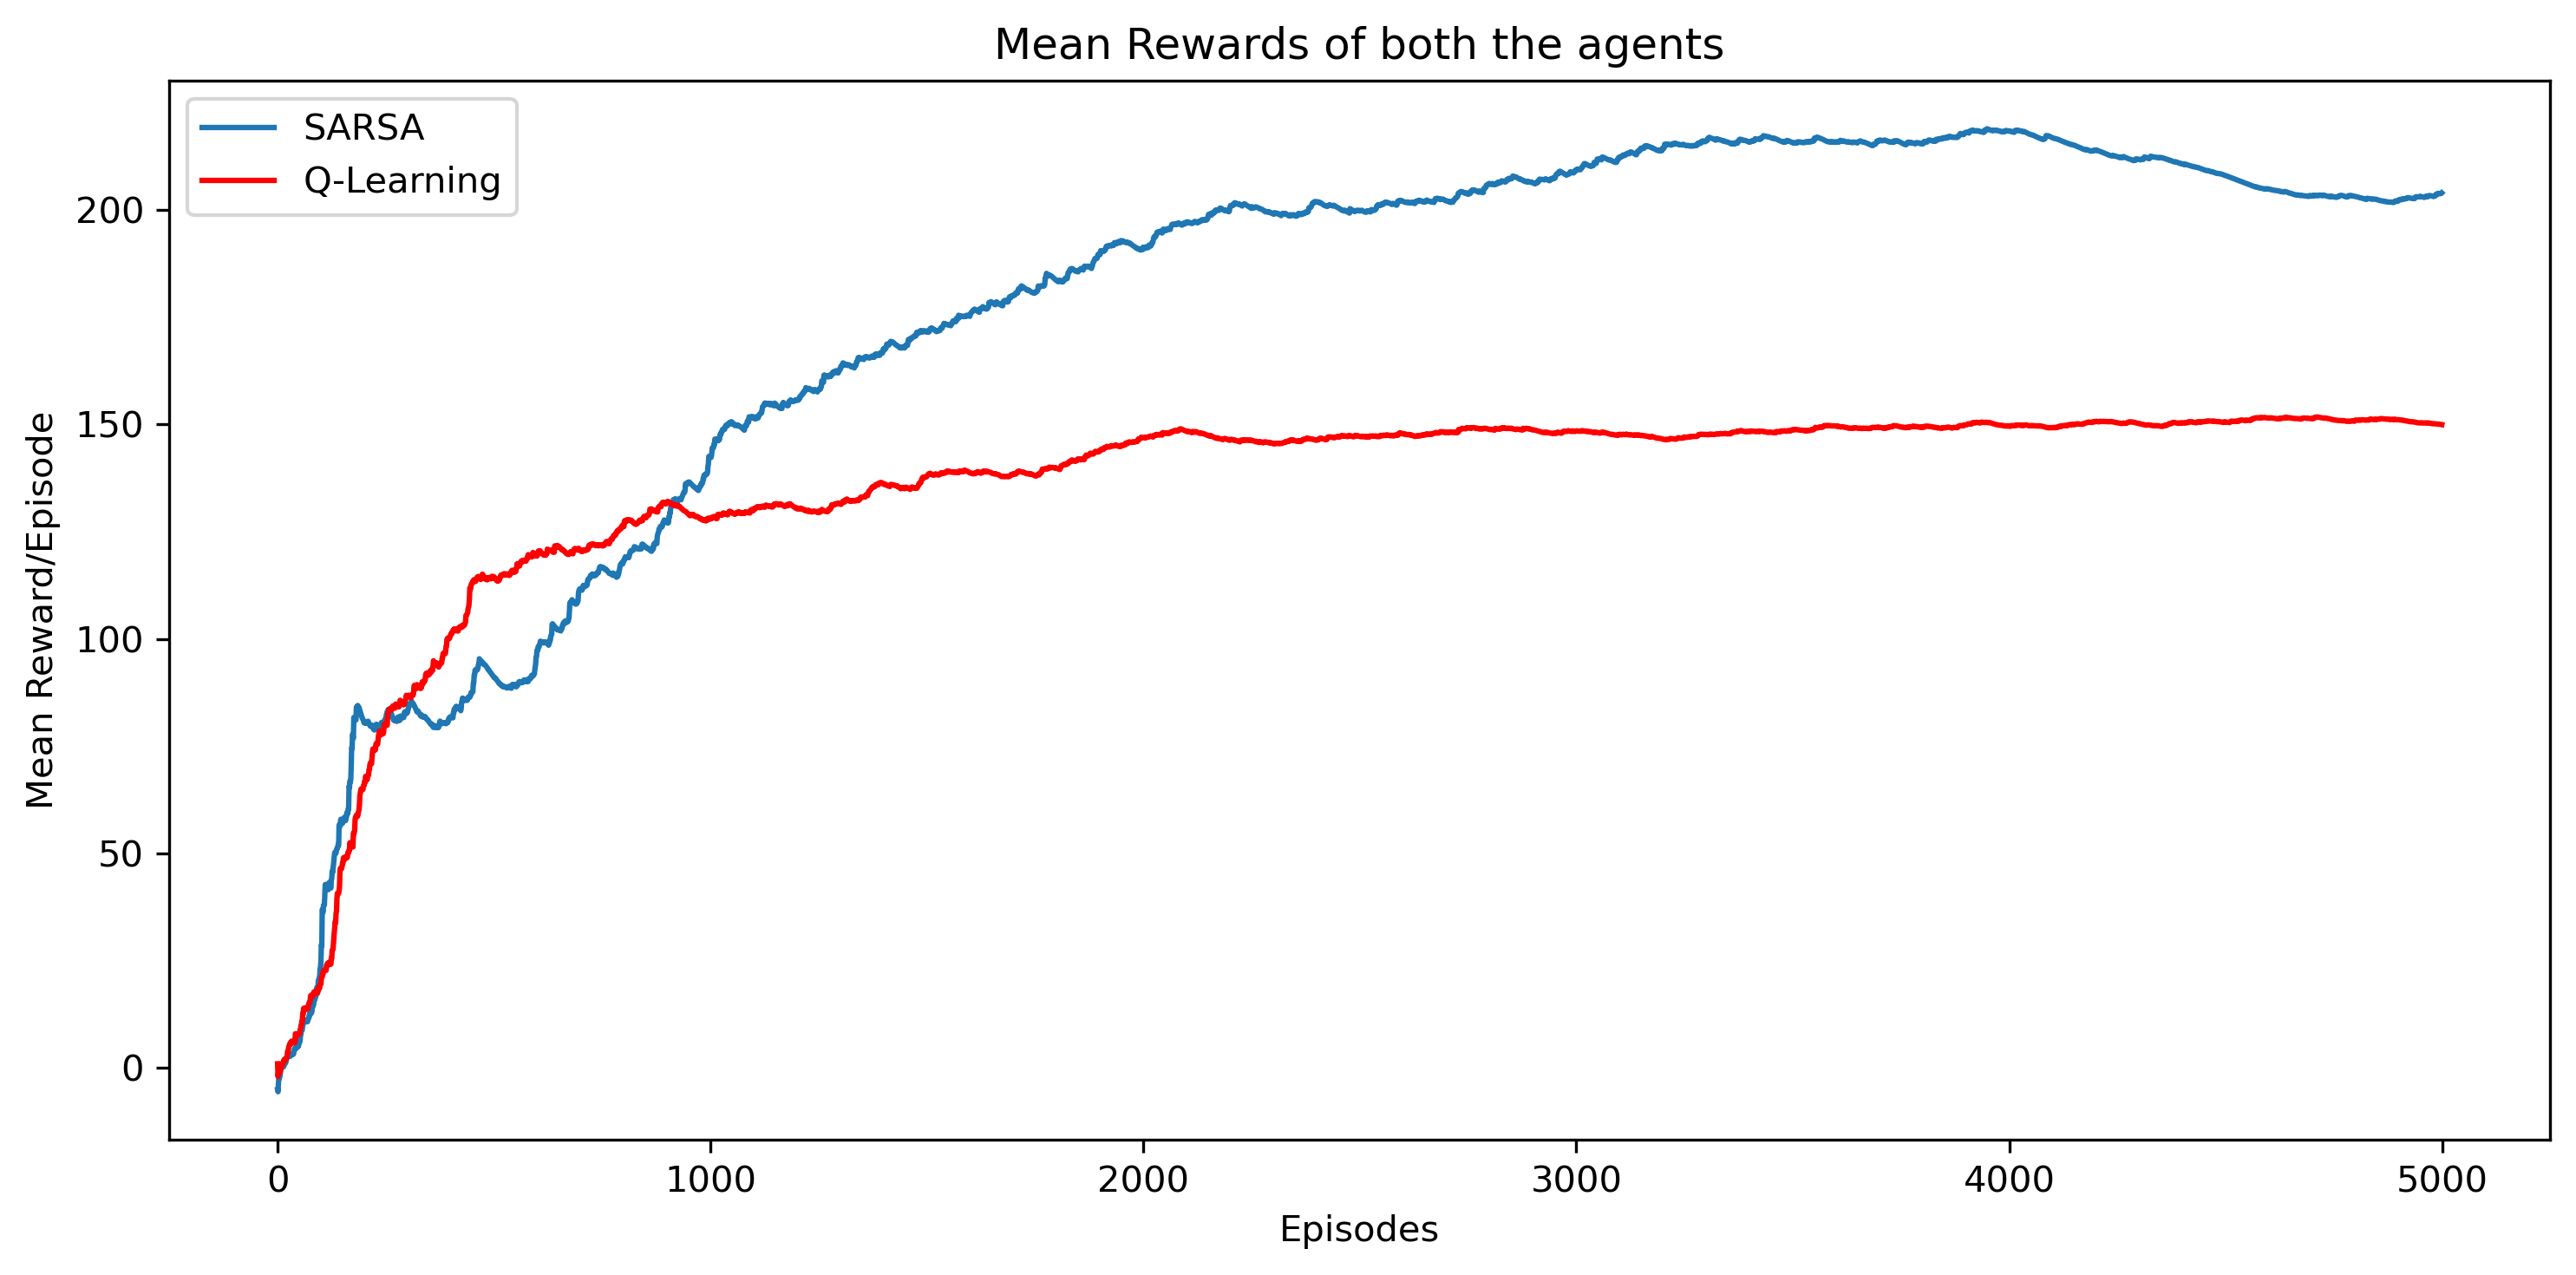

In [13]:
plt.figure(figsize=(10,5),dpi=300)
sarsa_info['Rewards'].expanding(1).mean().plot()
ql_info['Rewards'].expanding(1).mean().plot(color='red')
plt.ylabel('Mean Reward/Episode')
plt.xlabel('Episodes')
plt.title('Mean Rewards of both the agents')
plt.legend(['SARSA','Q-Learning'])
plt.tight_layout()
plt.savefig('mean_reward_plot.png')

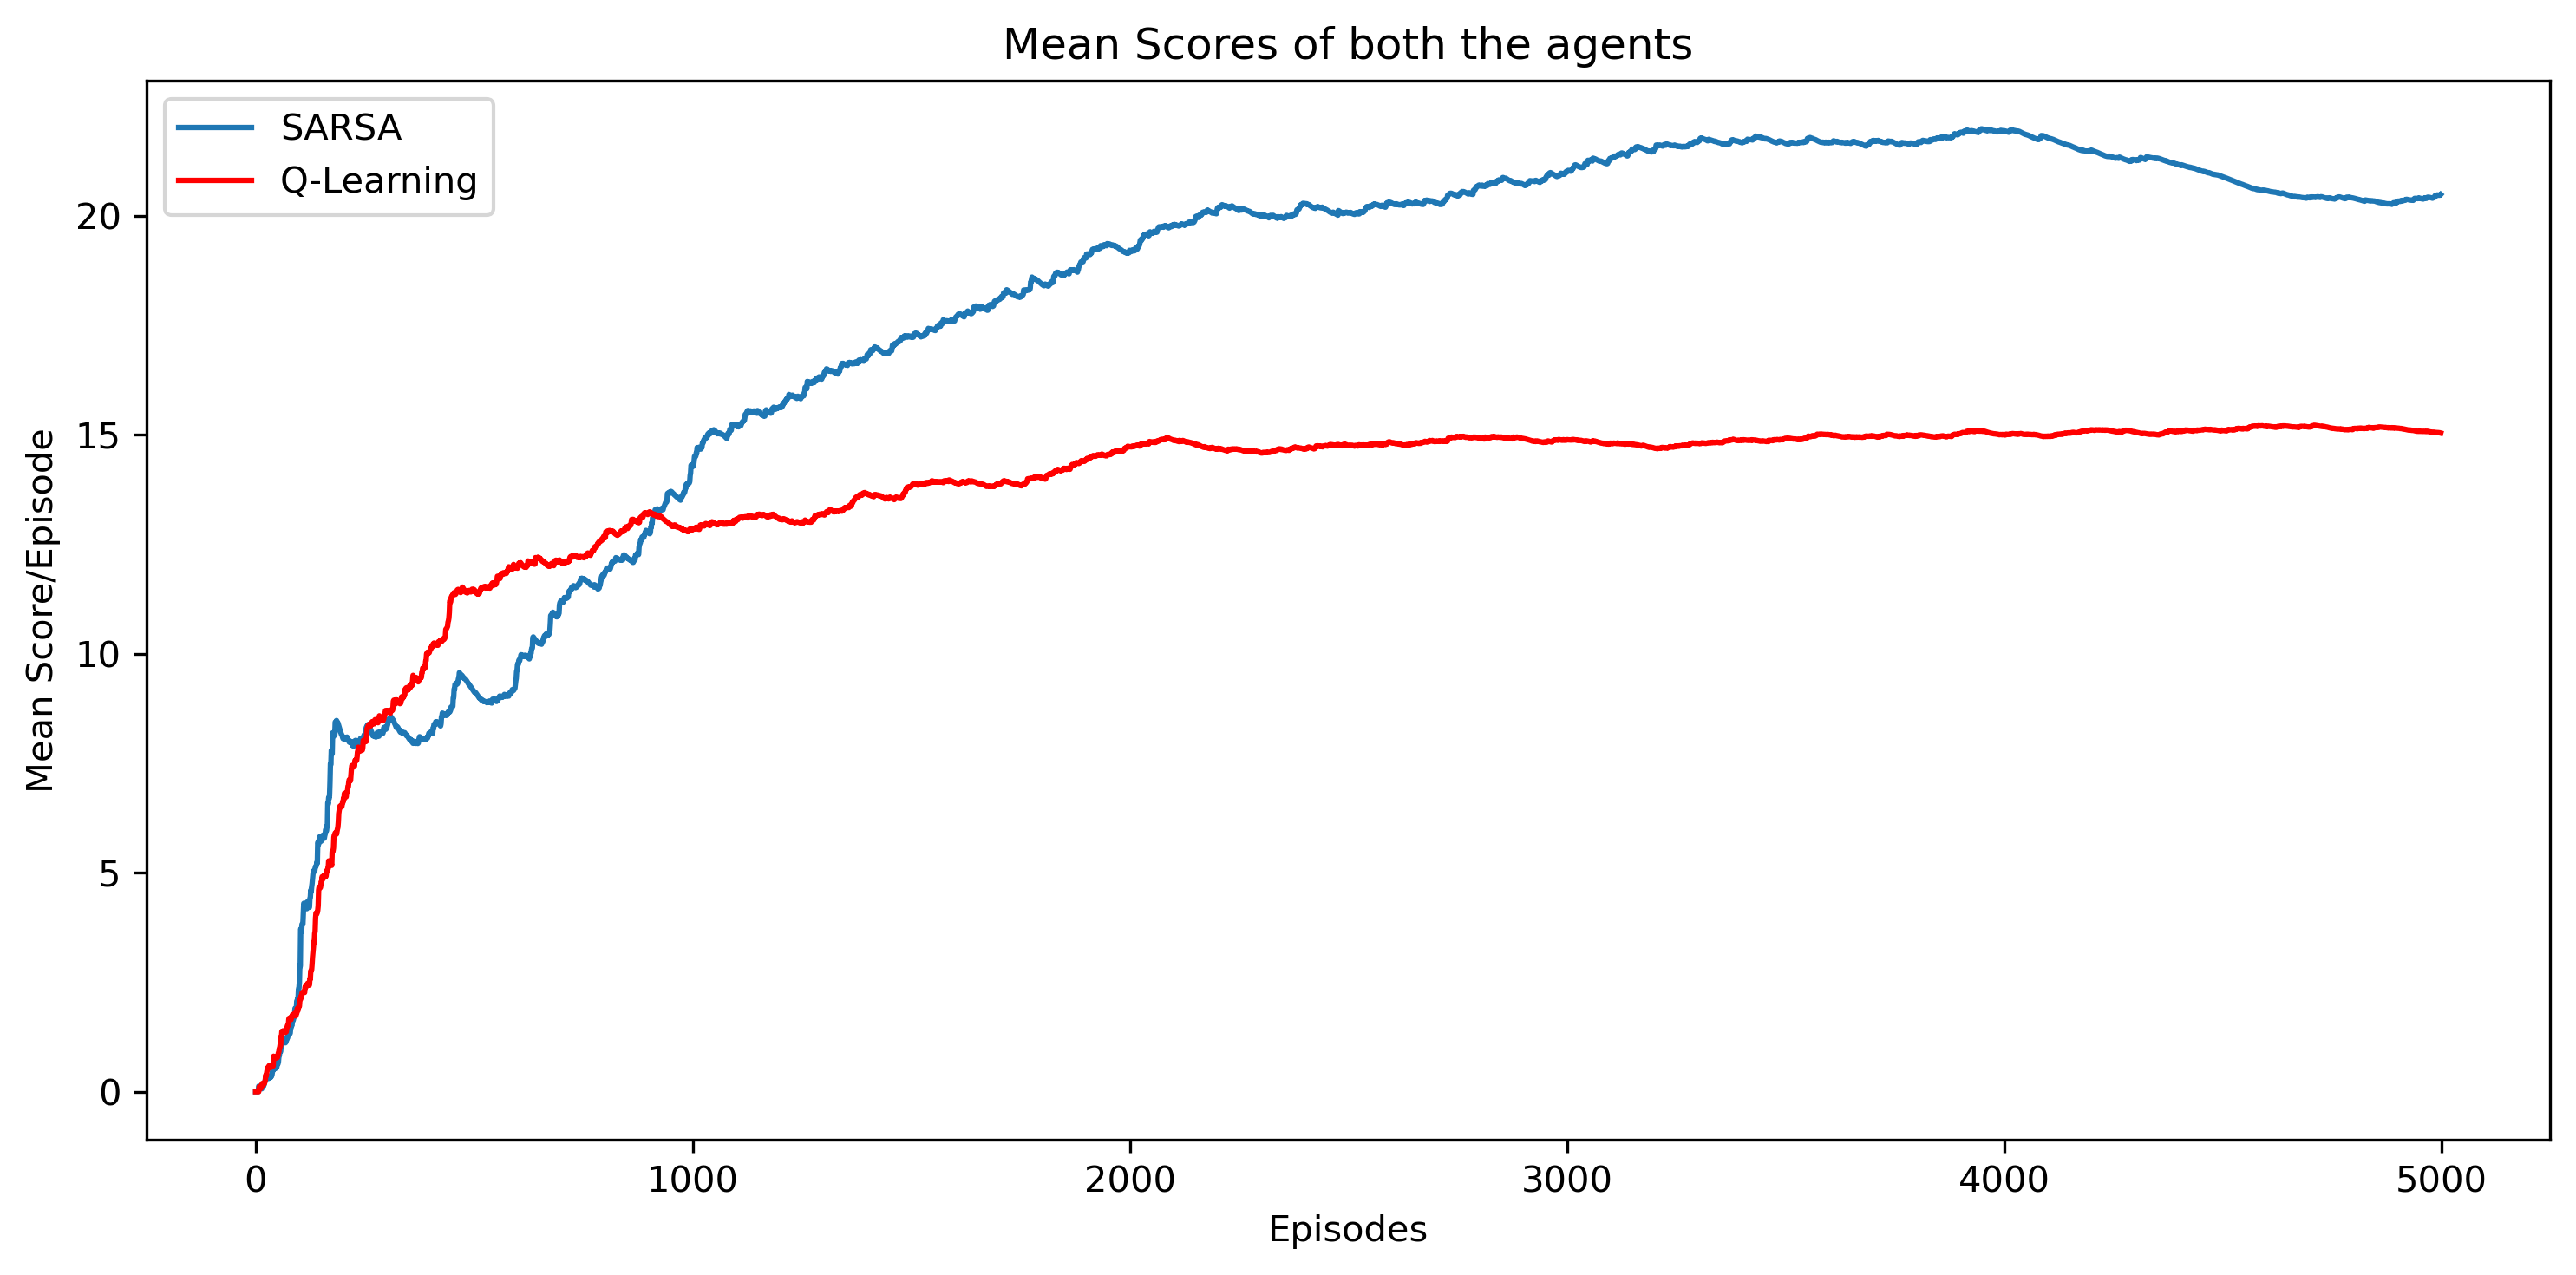

In [97]:
plt.figure(figsize=(10,5),dpi=300)
sarsa_info['Score'].expanding(1).mean().plot()
ql_info['Score'].expanding(1).mean().plot(color='red')
plt.ylabel('Mean Score/Episode')
plt.xlabel('Episodes')
plt.title('Mean Scores of both the agents')
plt.legend(['SARSA','Q-Learning'])
plt.tight_layout()
plt.savefig('mean_score_plot.png')

In [62]:
sarsa_qtable = sarsa_qtable.rename(columns={'Unnamed: 0':'State (X)',
                    'Unnamed: 1':'State (Y)',
                    '0': 'Action (Idle)',
                    '1': 'Action (Fly)'})


ql_qtable = ql_qtable.rename(columns={'Unnamed: 0':'State (X)',
                    'Unnamed: 1':'State (Y)',
                    '0': 'Action (Idle)',
                    '1': 'Action (Fly)'})

In [63]:
sarsa_heatmap_idle = sarsa_qtable.pivot(index='State (X)',columns='State (Y)',values='Action (Idle)')
sarsa_heatmap_fly = sarsa_qtable.pivot(index='State (X)',columns='State (Y)',values='Action (Fly)')



ql_heatmap_idle = ql_qtable.pivot(index='State (X)',columns='State (Y)',values='Action (Idle)')
ql_heatmap_fly = ql_qtable.pivot(index='State (X)',columns='State (Y)',values='Action (Fly)')

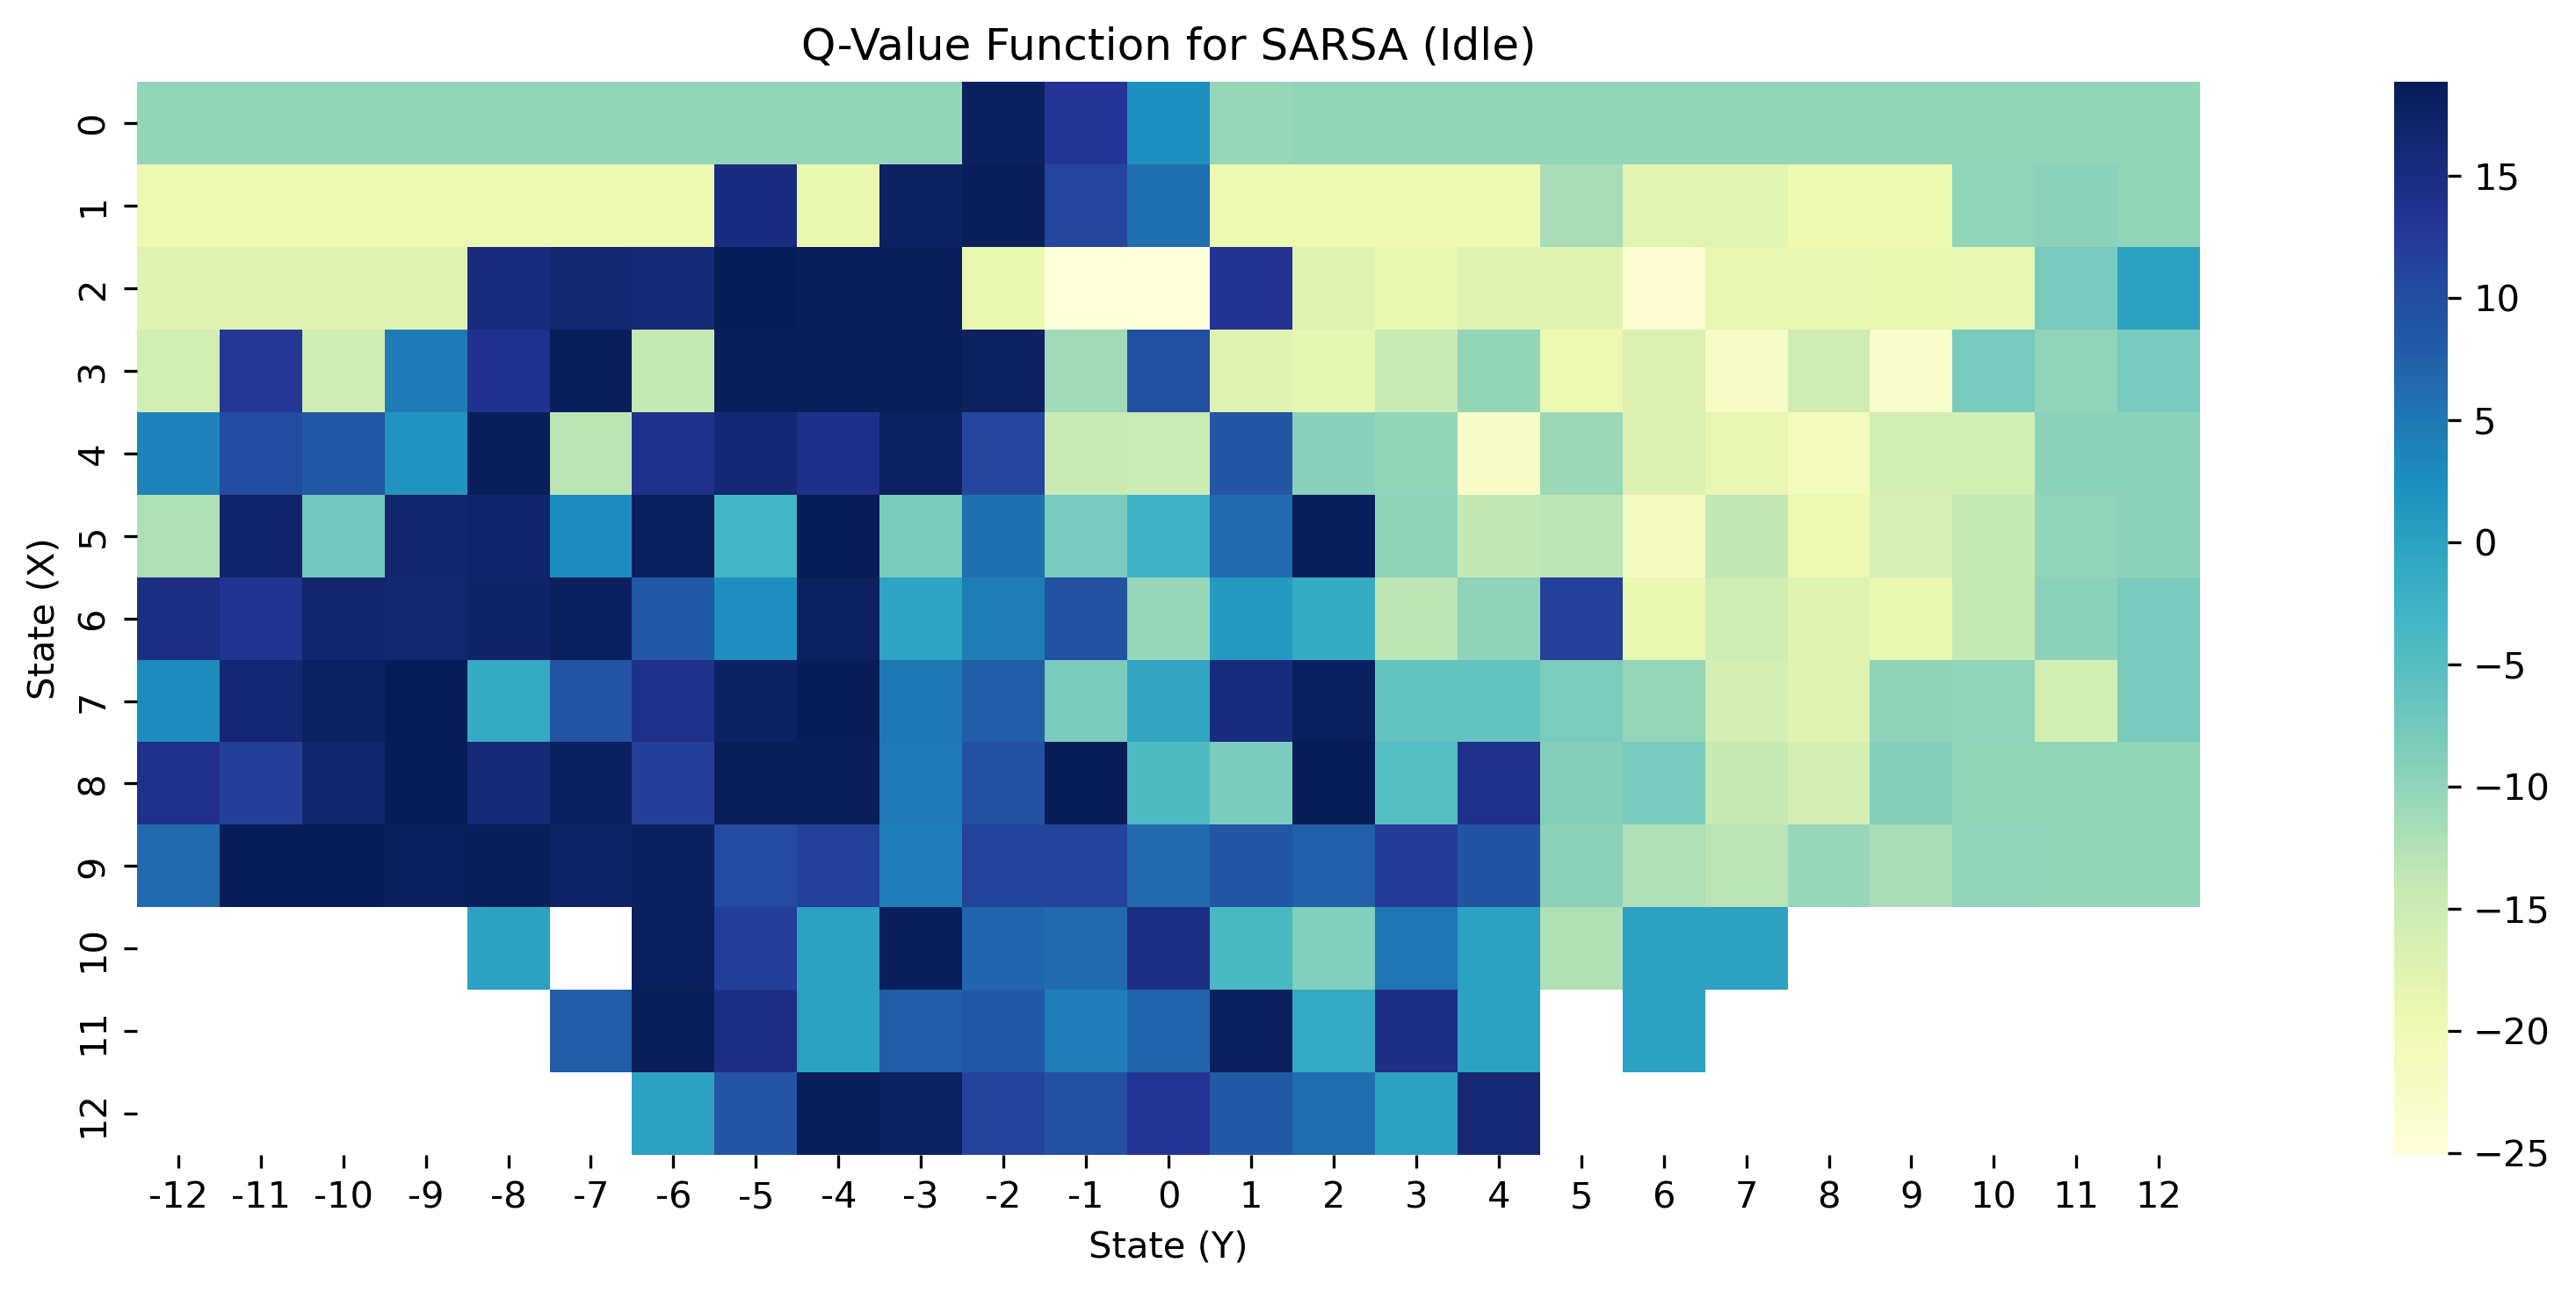

In [103]:
plt.figure(figsize=(15,5),dpi=300)
sns.heatmap(sarsa_heatmap_idle,square=True,cmap="YlGnBu")
plt.title('Q-Value Function for SARSA (Idle)')
plt.tight_layout()
plt.savefig('qvalue_function_sarsa_idle.png')

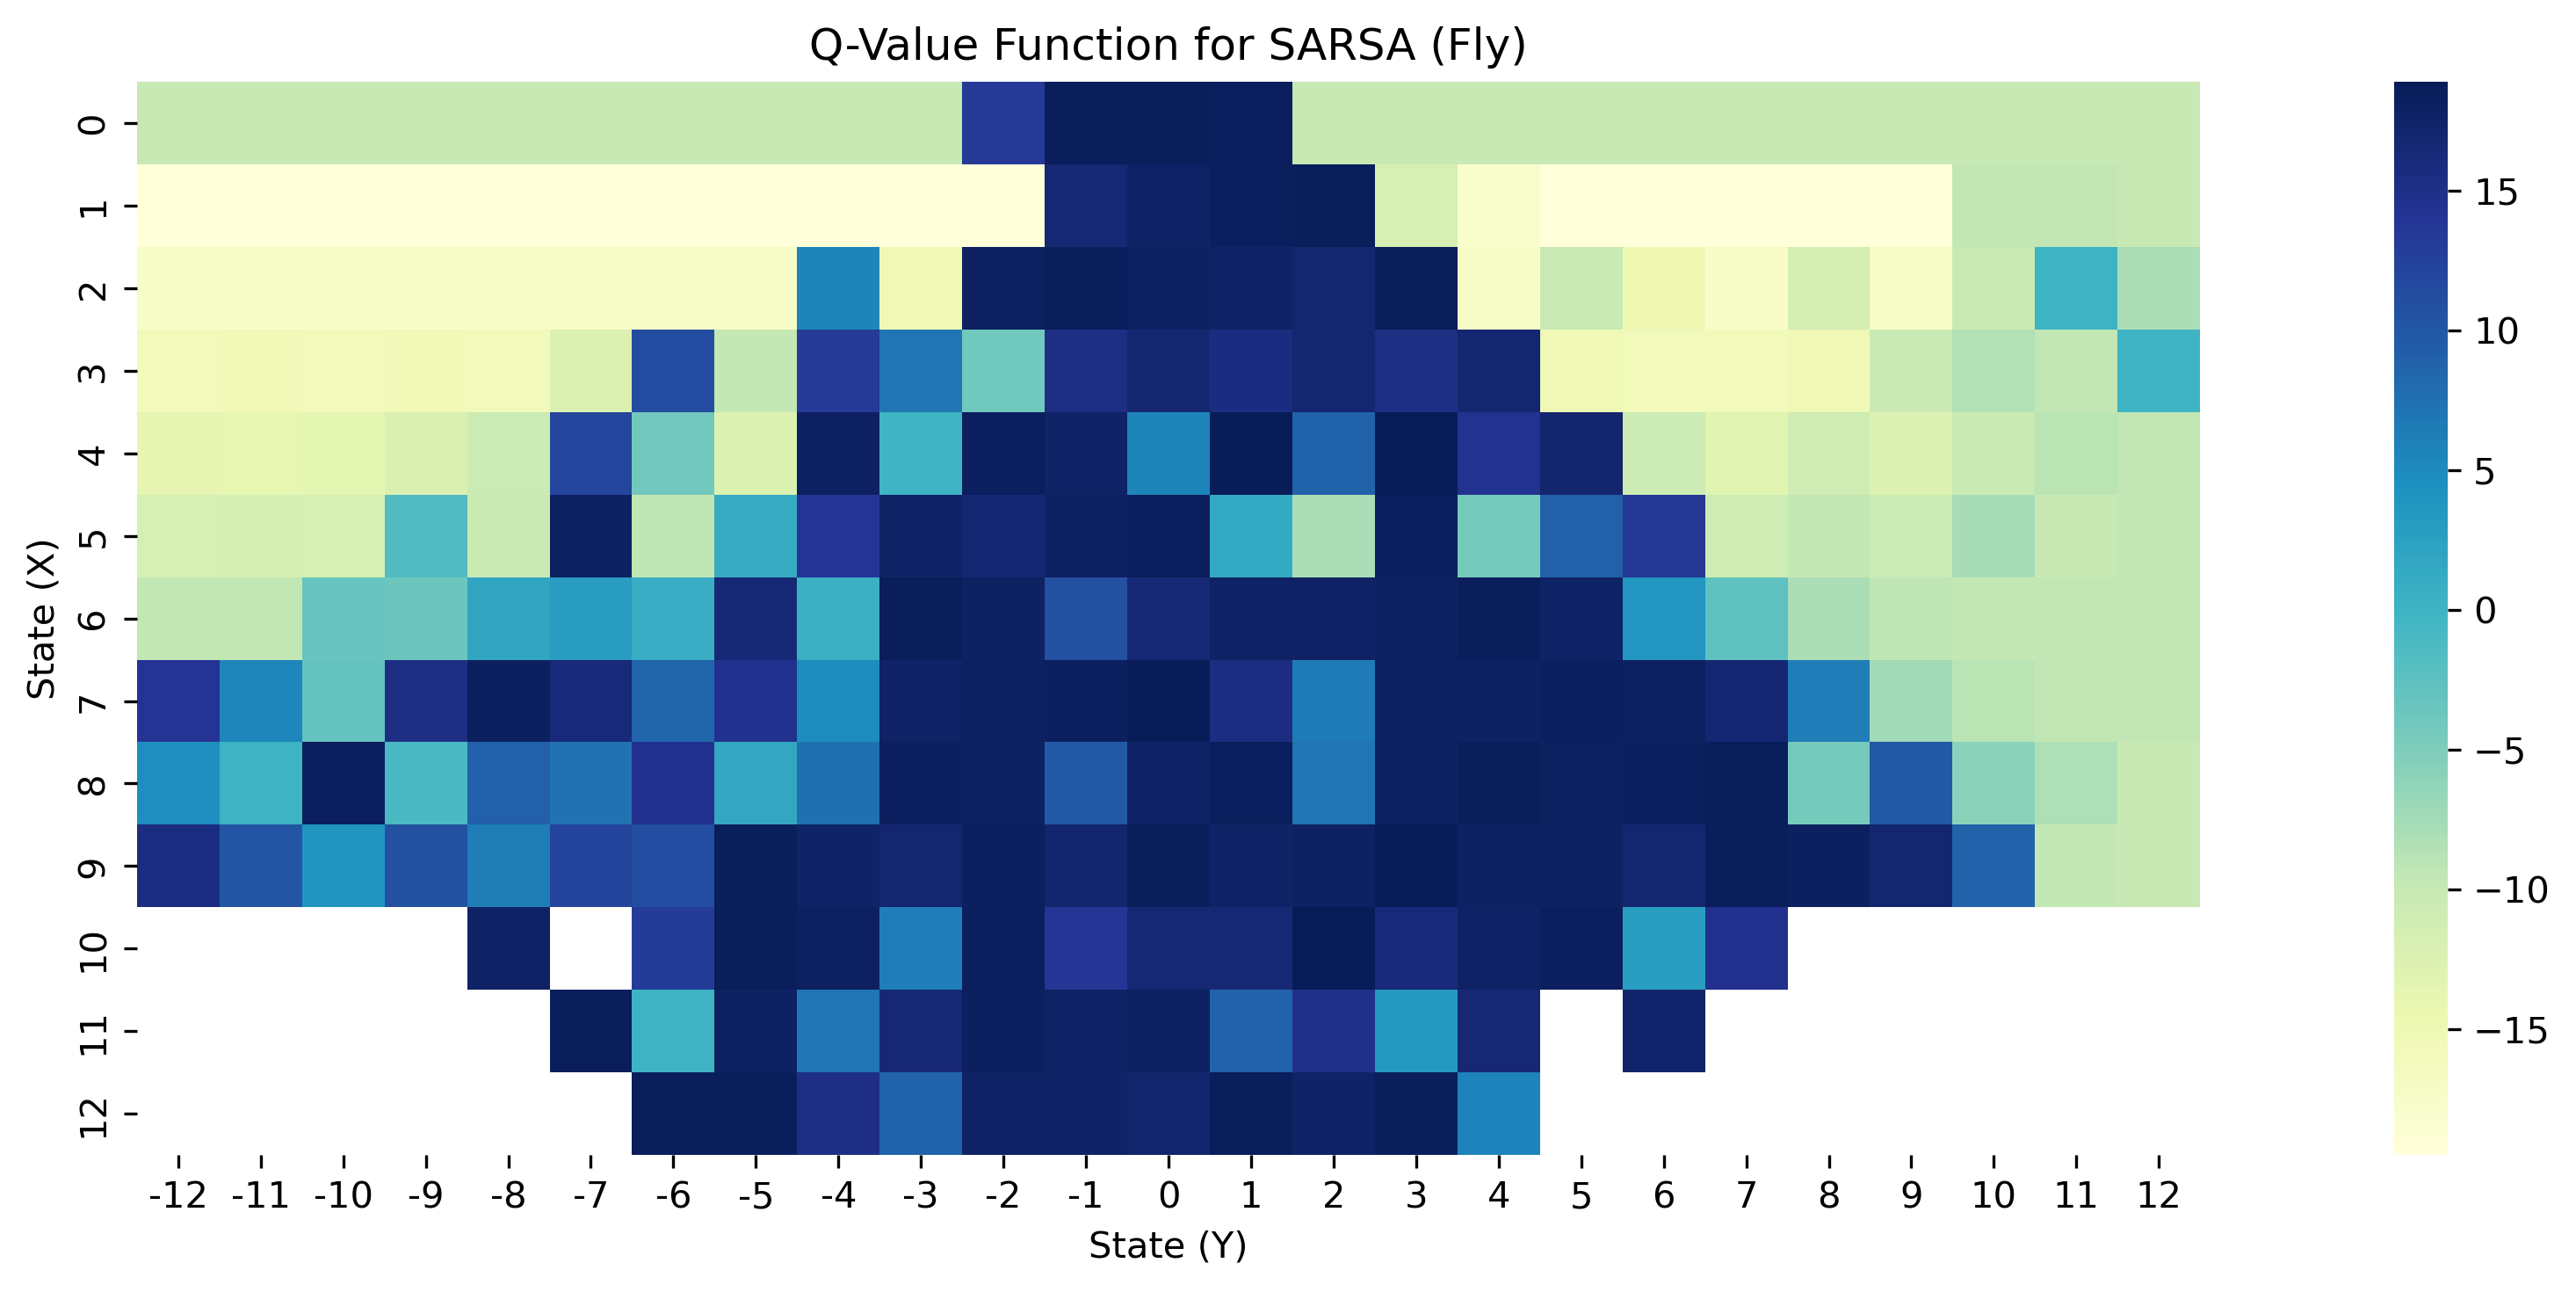

In [104]:
plt.figure(figsize=(15,5),dpi=300)
sns.heatmap(sarsa_heatmap_fly,square=True,cmap="YlGnBu")
plt.title('Q-Value Function for SARSA (Fly)')
plt.tight_layout()
plt.savefig('qvalue_function_sarsa_fly.png')

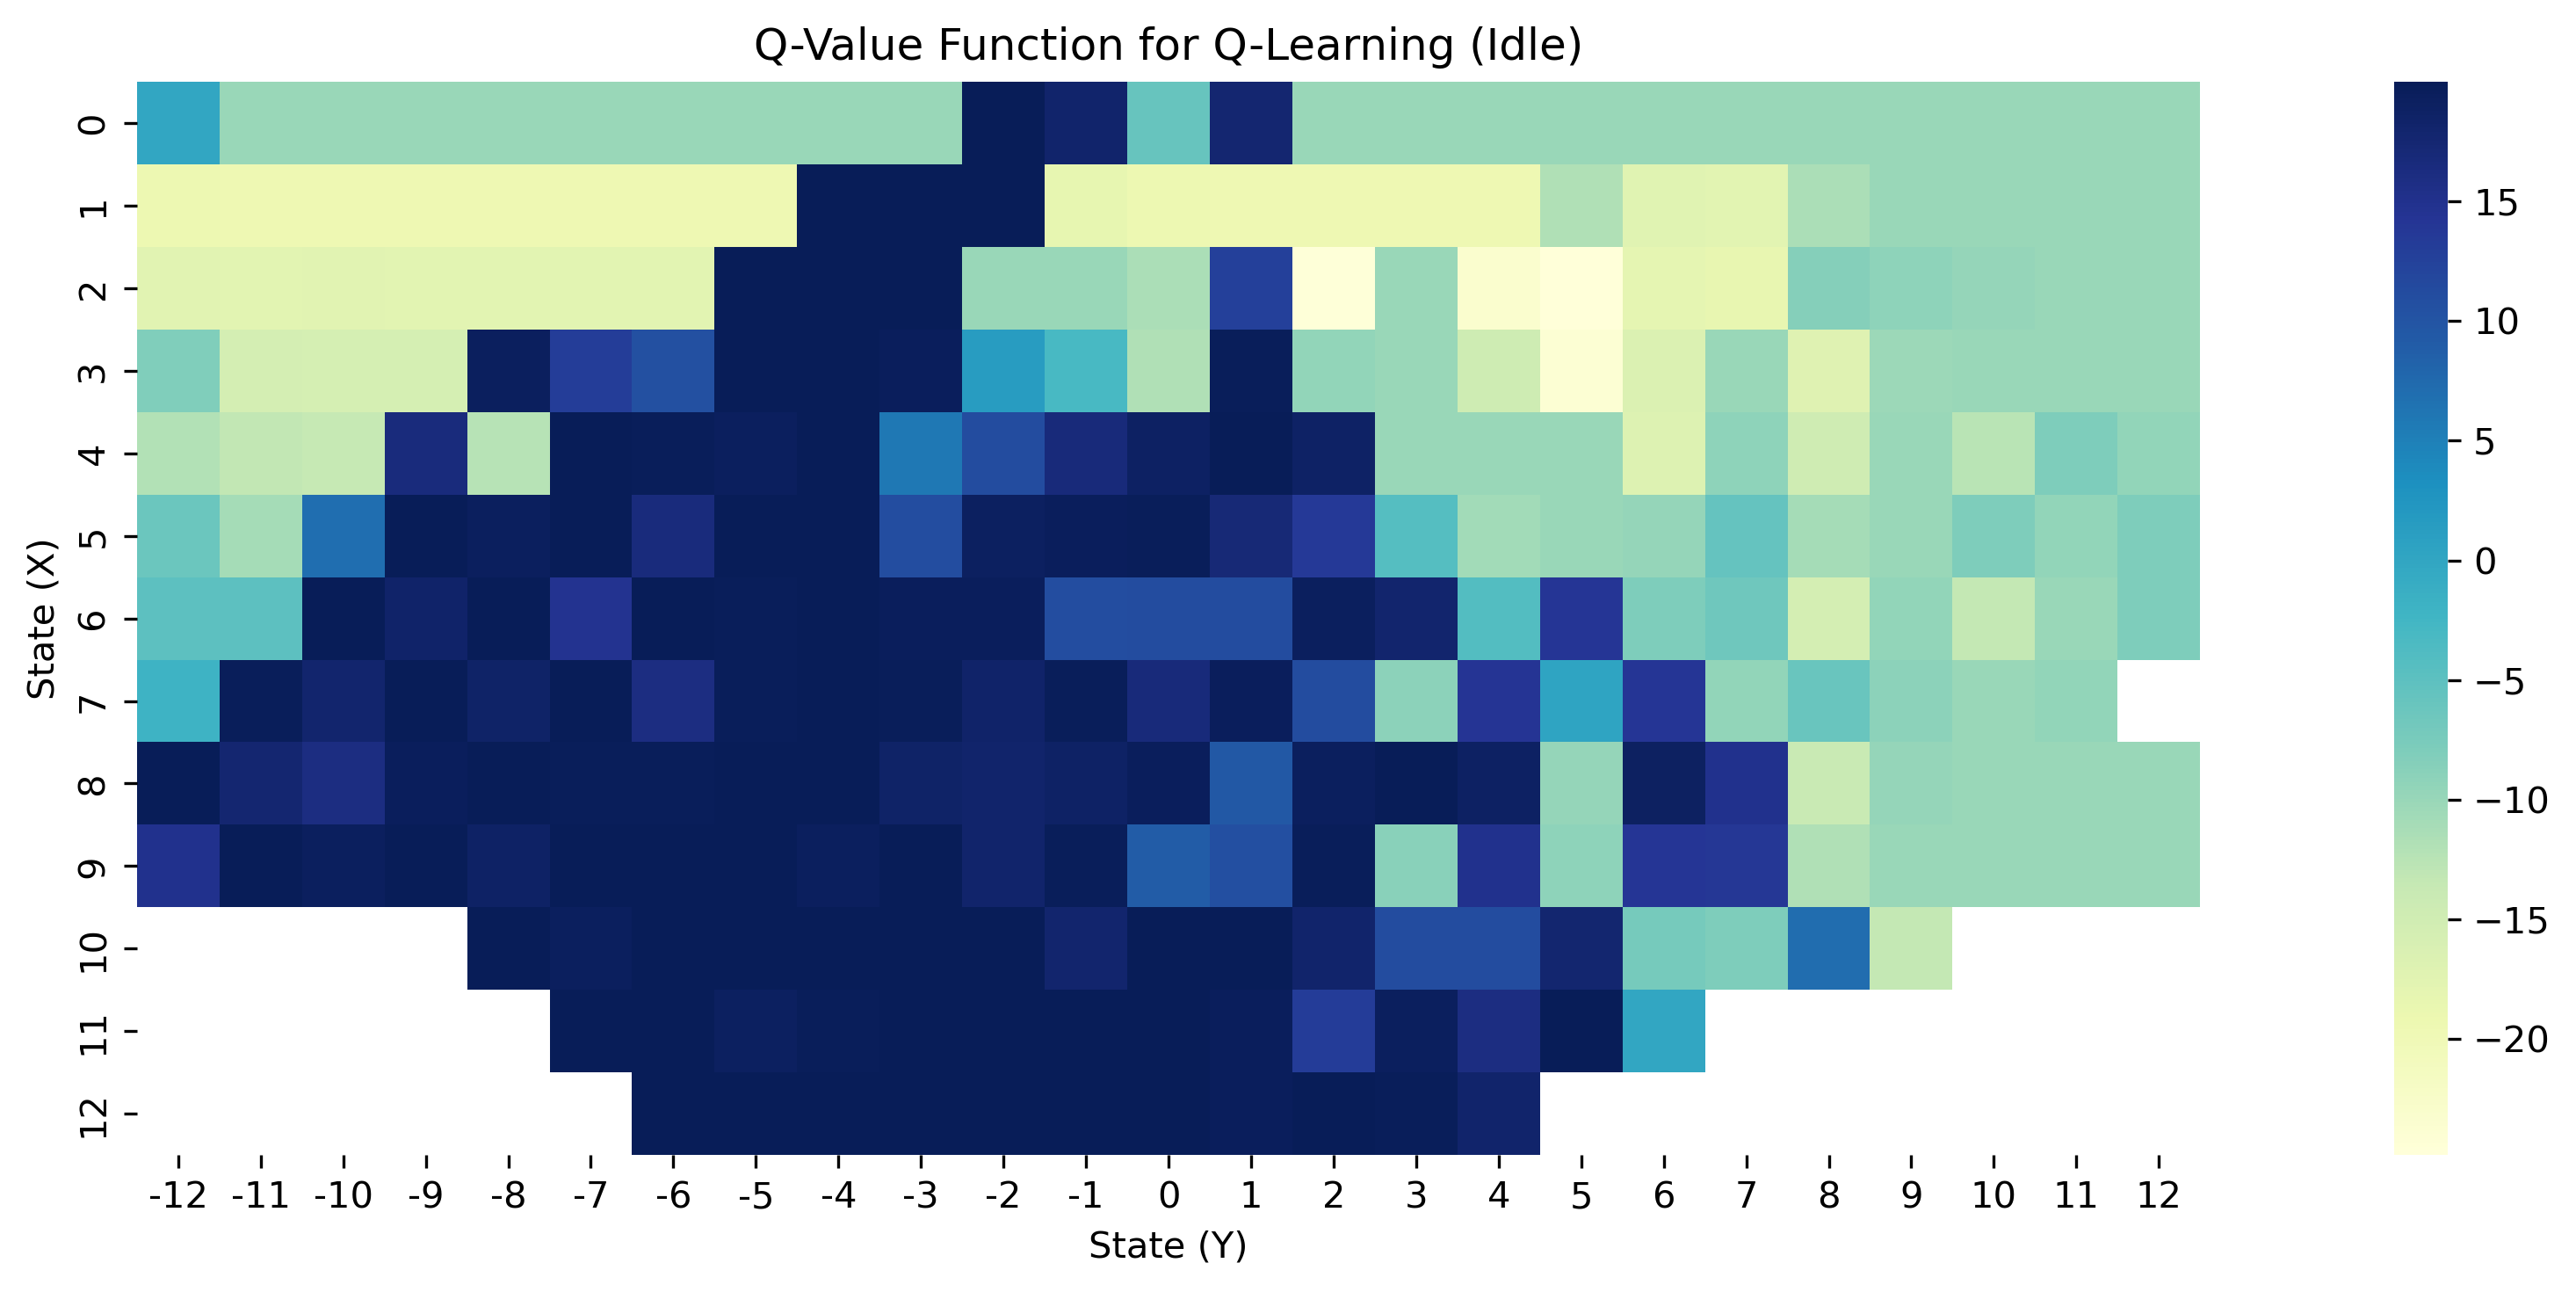

In [105]:
plt.figure(figsize=(15,5),dpi=300)
sns.heatmap(ql_heatmap_idle,square=True,cmap="YlGnBu")
plt.title('Q-Value Function for Q-Learning (Idle)')
plt.tight_layout()
plt.savefig('qvalue_function_qlearning_idle.png')

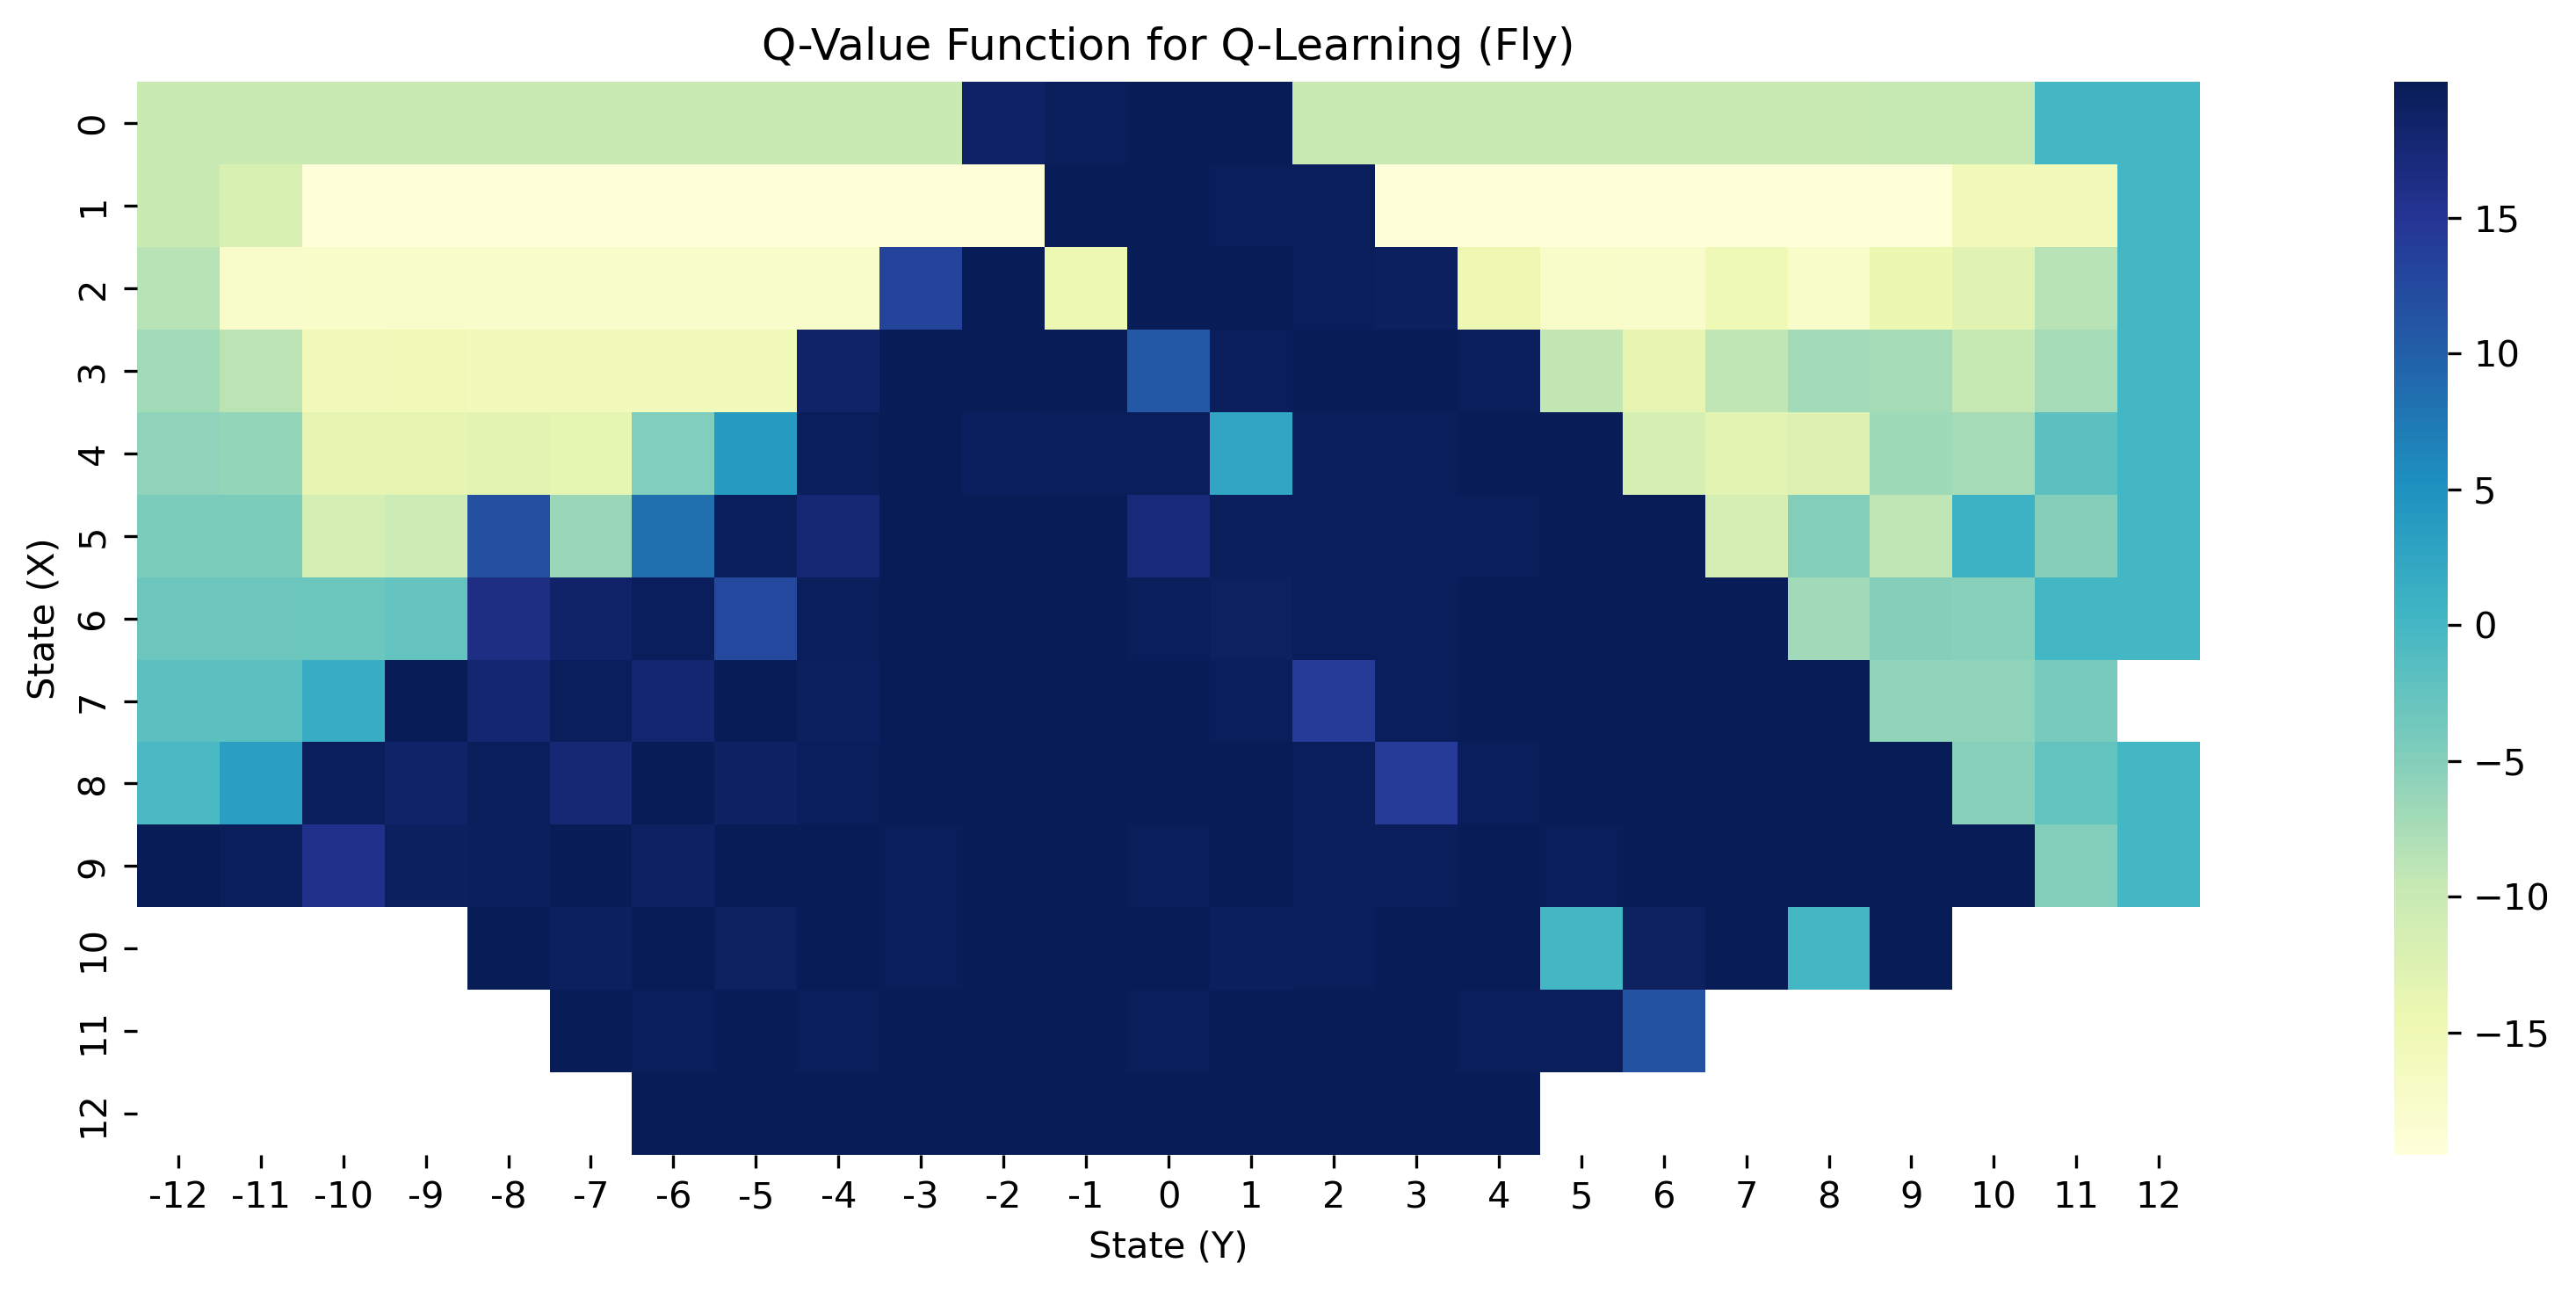

In [106]:
plt.figure(figsize=(15,5),dpi=300)
sns.heatmap(ql_heatmap_fly,square=True,cmap="YlGnBu")
plt.title('Q-Value Function for Q-Learning (Fly)')
plt.tight_layout()
plt.savefig('qvalue_function_qlearning_idle.png')

# Parameter Sweeps

In [58]:
#Sweeps for Q-learning & SARSA (Epsilon)
ps_eps_ql = pd.read_csv(DIR+'ps_eps_qlearning.csv')
ps_eps_ql = ps_eps_ql.set_index('Epsilon')
ps_eps_ql = ps_eps_ql.drop('Unnamed: 0',axis=1)

ps_eps_sarsa = pd.read_csv(DIR+'ps_es_sarsa.csv')
ps_eps_sarsa = ps_eps_sarsa.set_index('Epsilon')
ps_eps_sarsa = ps_eps_sarsa.drop('Unnamed: 0',axis=1)

ps_epsilon = pd.DataFrame({'Epsilon_QLearning':ps_eps_ql['Mean Reward'],
                          'Epsilon_SARSA':ps_eps_sarsa['Mean Reward']},
                         index=ps_eps_ql.index)

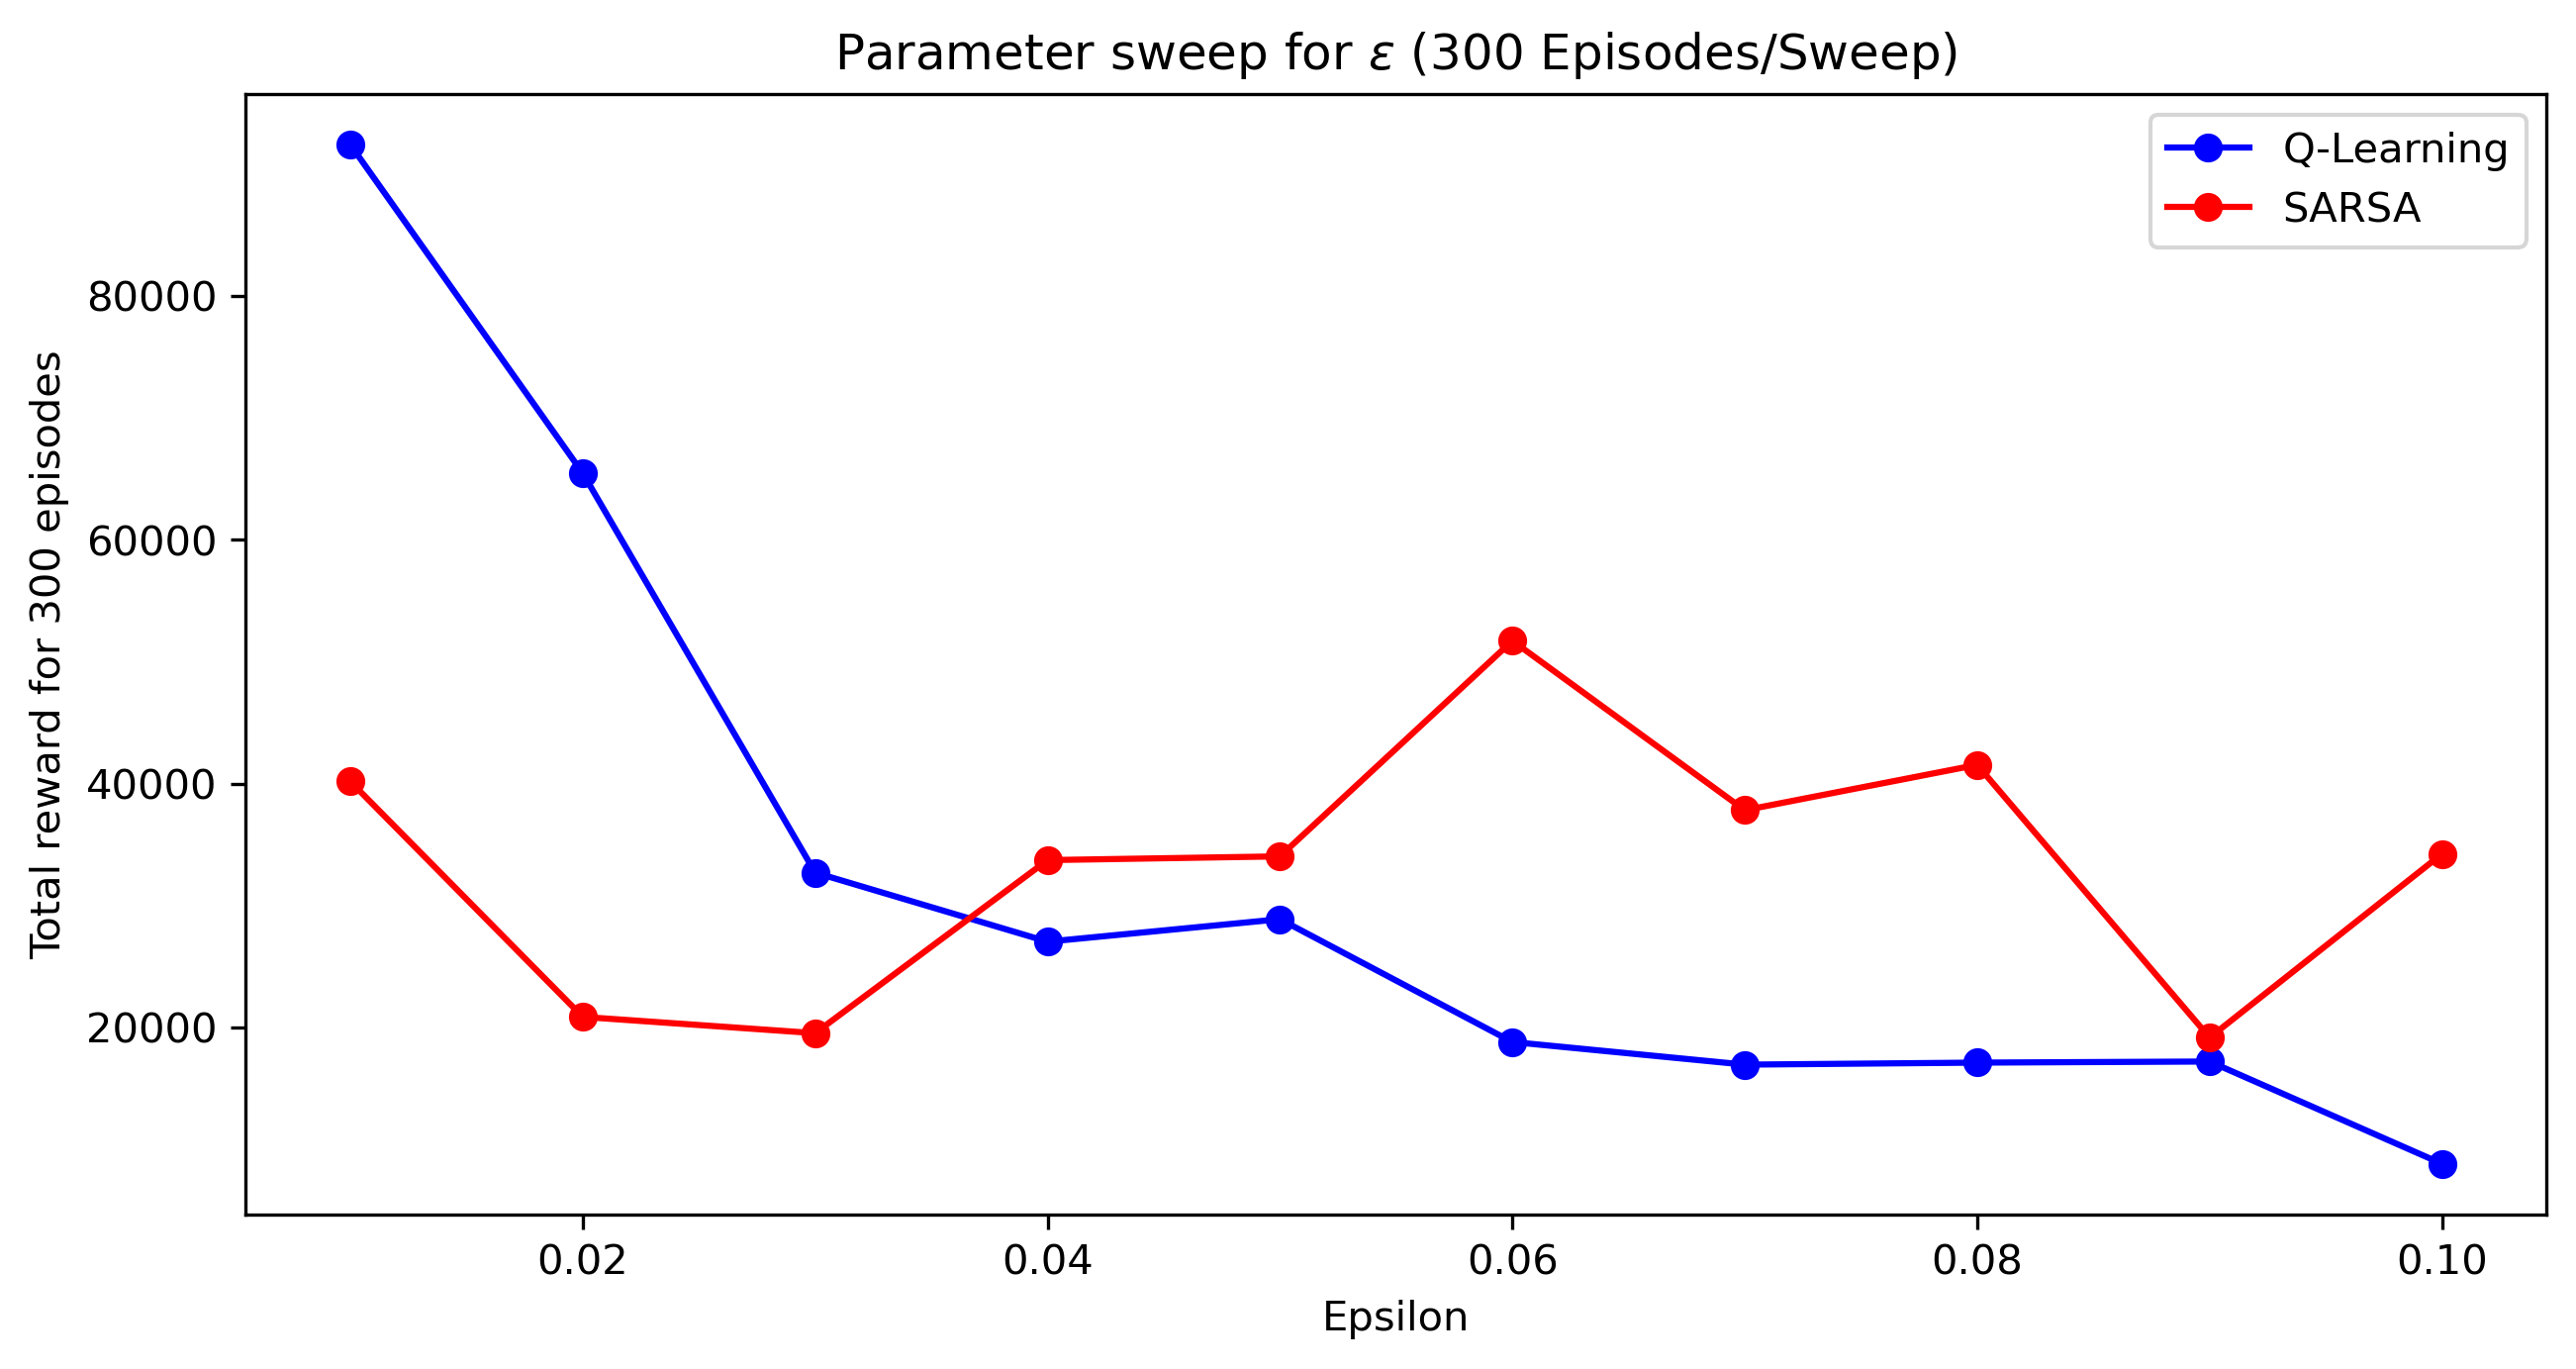

In [79]:
plt.figure(figsize=(10,5),dpi=300)
plt.plot(ps_epsilon['Epsilon_QLearning'],"-o",color='blue')
plt.plot(ps_epsilon['Epsilon_SARSA'],"-o",color='red')
plt.xlabel('Epsilon')
plt.ylabel('Total reward for 300 episodes')
plt.title('Parameter sweep for $\epsilon$ (300 Episodes/Sweep)')
plt.legend(['Q-Learning','SARSA'])
plt.savefig('ps_epsilon.png')

In [70]:
#Sweeps for Q-learning & SARSA (Step Size)
ps_ss_ql = pd.read_csv(DIR+'ps_ss_qlearning.csv')
ps_ss_ql = ps_ss_ql.set_index('Step-Size')
ps_ss_ql = ps_ss_ql.drop('Unnamed: 0',axis=1)

ps_ss_sarsa = pd.read_csv(DIR+'ps_ss_sarsa.csv')
ps_ss_sarsa = ps_ss_sarsa.set_index('Step_Size')
ps_ss_sarsa = ps_ss_sarsa.drop('Unnamed: 0',axis=1)

ps_ss = pd.DataFrame({'StepSize_QLearning':ps_ss_ql['Mean Reward'],
                          'StepSize_SARSA':ps_ss_sarsa['Mean Reward']},
                         index=ps_ss_sarsa.index)

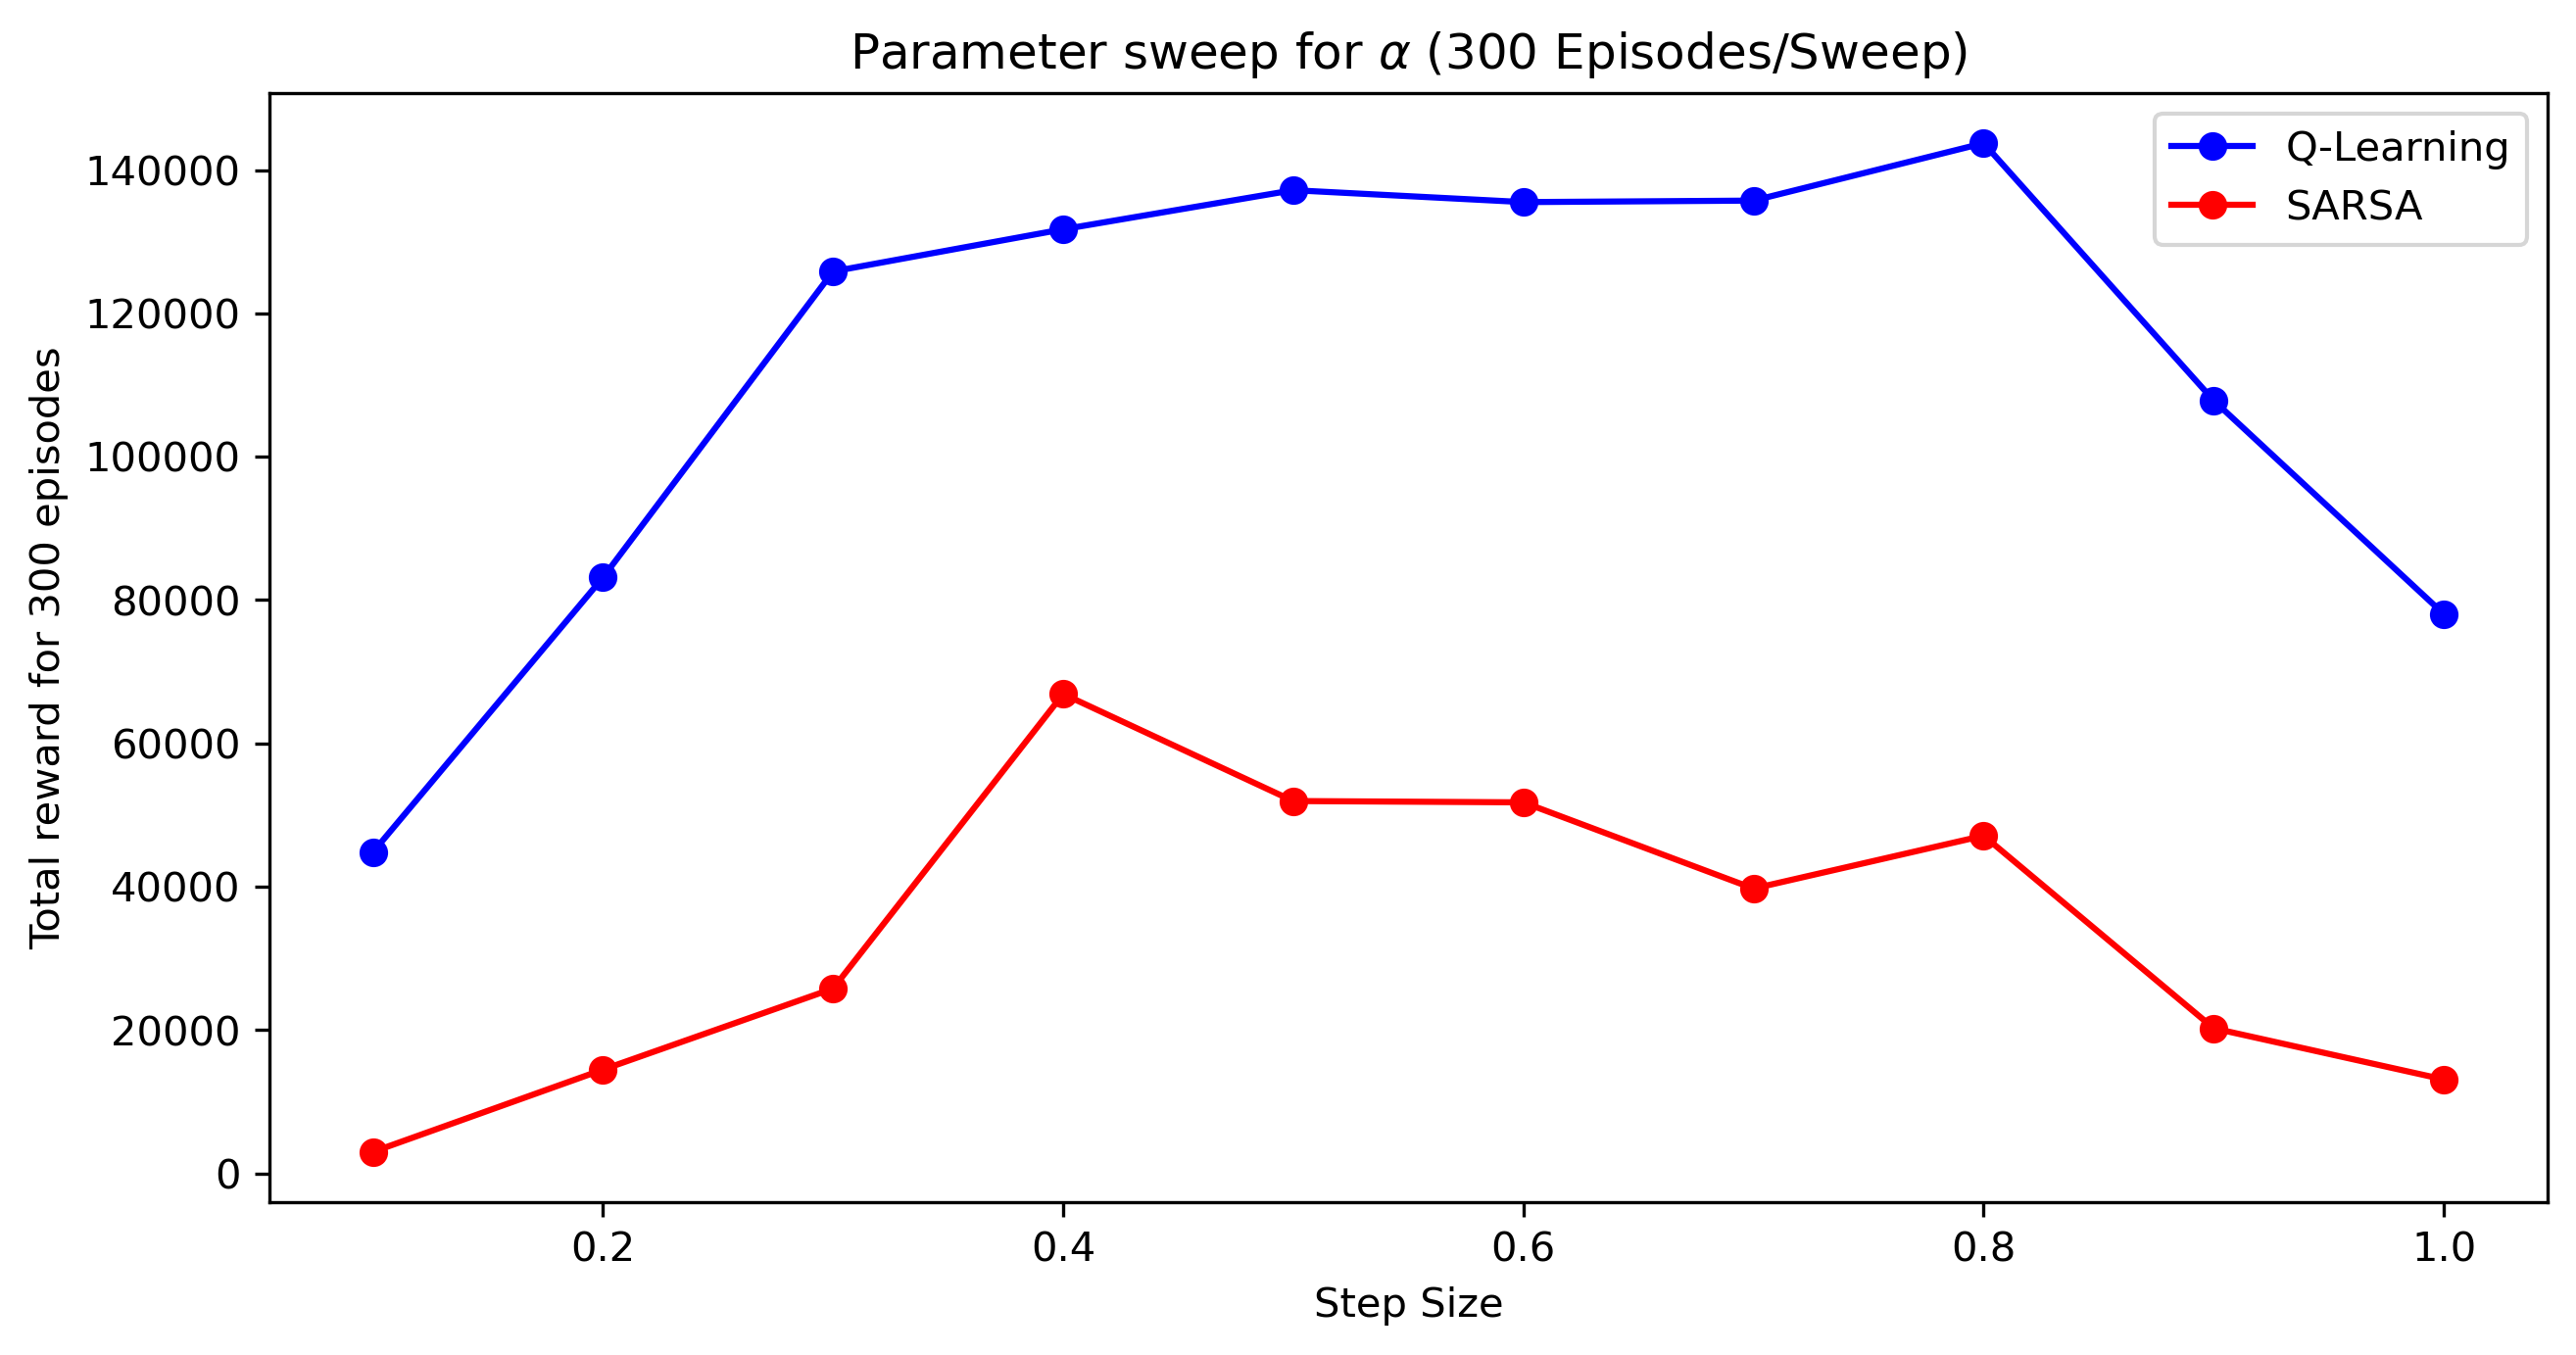

In [93]:
plt.figure(figsize=(10,5),dpi=300)
plt.plot(ps_ss['StepSize_QLearning'],"-o",color='blue')
plt.plot(ps_ss['StepSize_SARSA'],"-o",color='red')
plt.xlabel('Step Size')
plt.ylabel('Total reward for 300 episodes')
plt.title('Parameter sweep for $\\alpha$ (300 Episodes/Sweep)')
plt.legend(['Q-Learning','SARSA'])
plt.savefig('ps_alpha.png')

In [91]:
#Sweeps for Q-learning & SARSA (Discount factor)
ps_g_ql = pd.read_csv(DIR+'ps_g_qlearning.csv')
ps_g_ql = ps_g_ql.set_index('Epsilon')
ps_g_ql = ps_g_ql.drop('Unnamed: 0',axis=1)

ps_g_sarsa = pd.read_csv(DIR+'ps_g_sarsa.csv')
ps_g_sarsa = ps_g_sarsa.set_index('Gamma')
ps_g_sarsa = ps_g_sarsa.drop('Unnamed: 0',axis=1)

ps_g = pd.DataFrame({'Gamma_QLearning':ps_g_ql['Mean Reward'],
                          'Gamma_SARSA':ps_g_sarsa['Mean Reward']},
                         index=ps_g_sarsa.index)

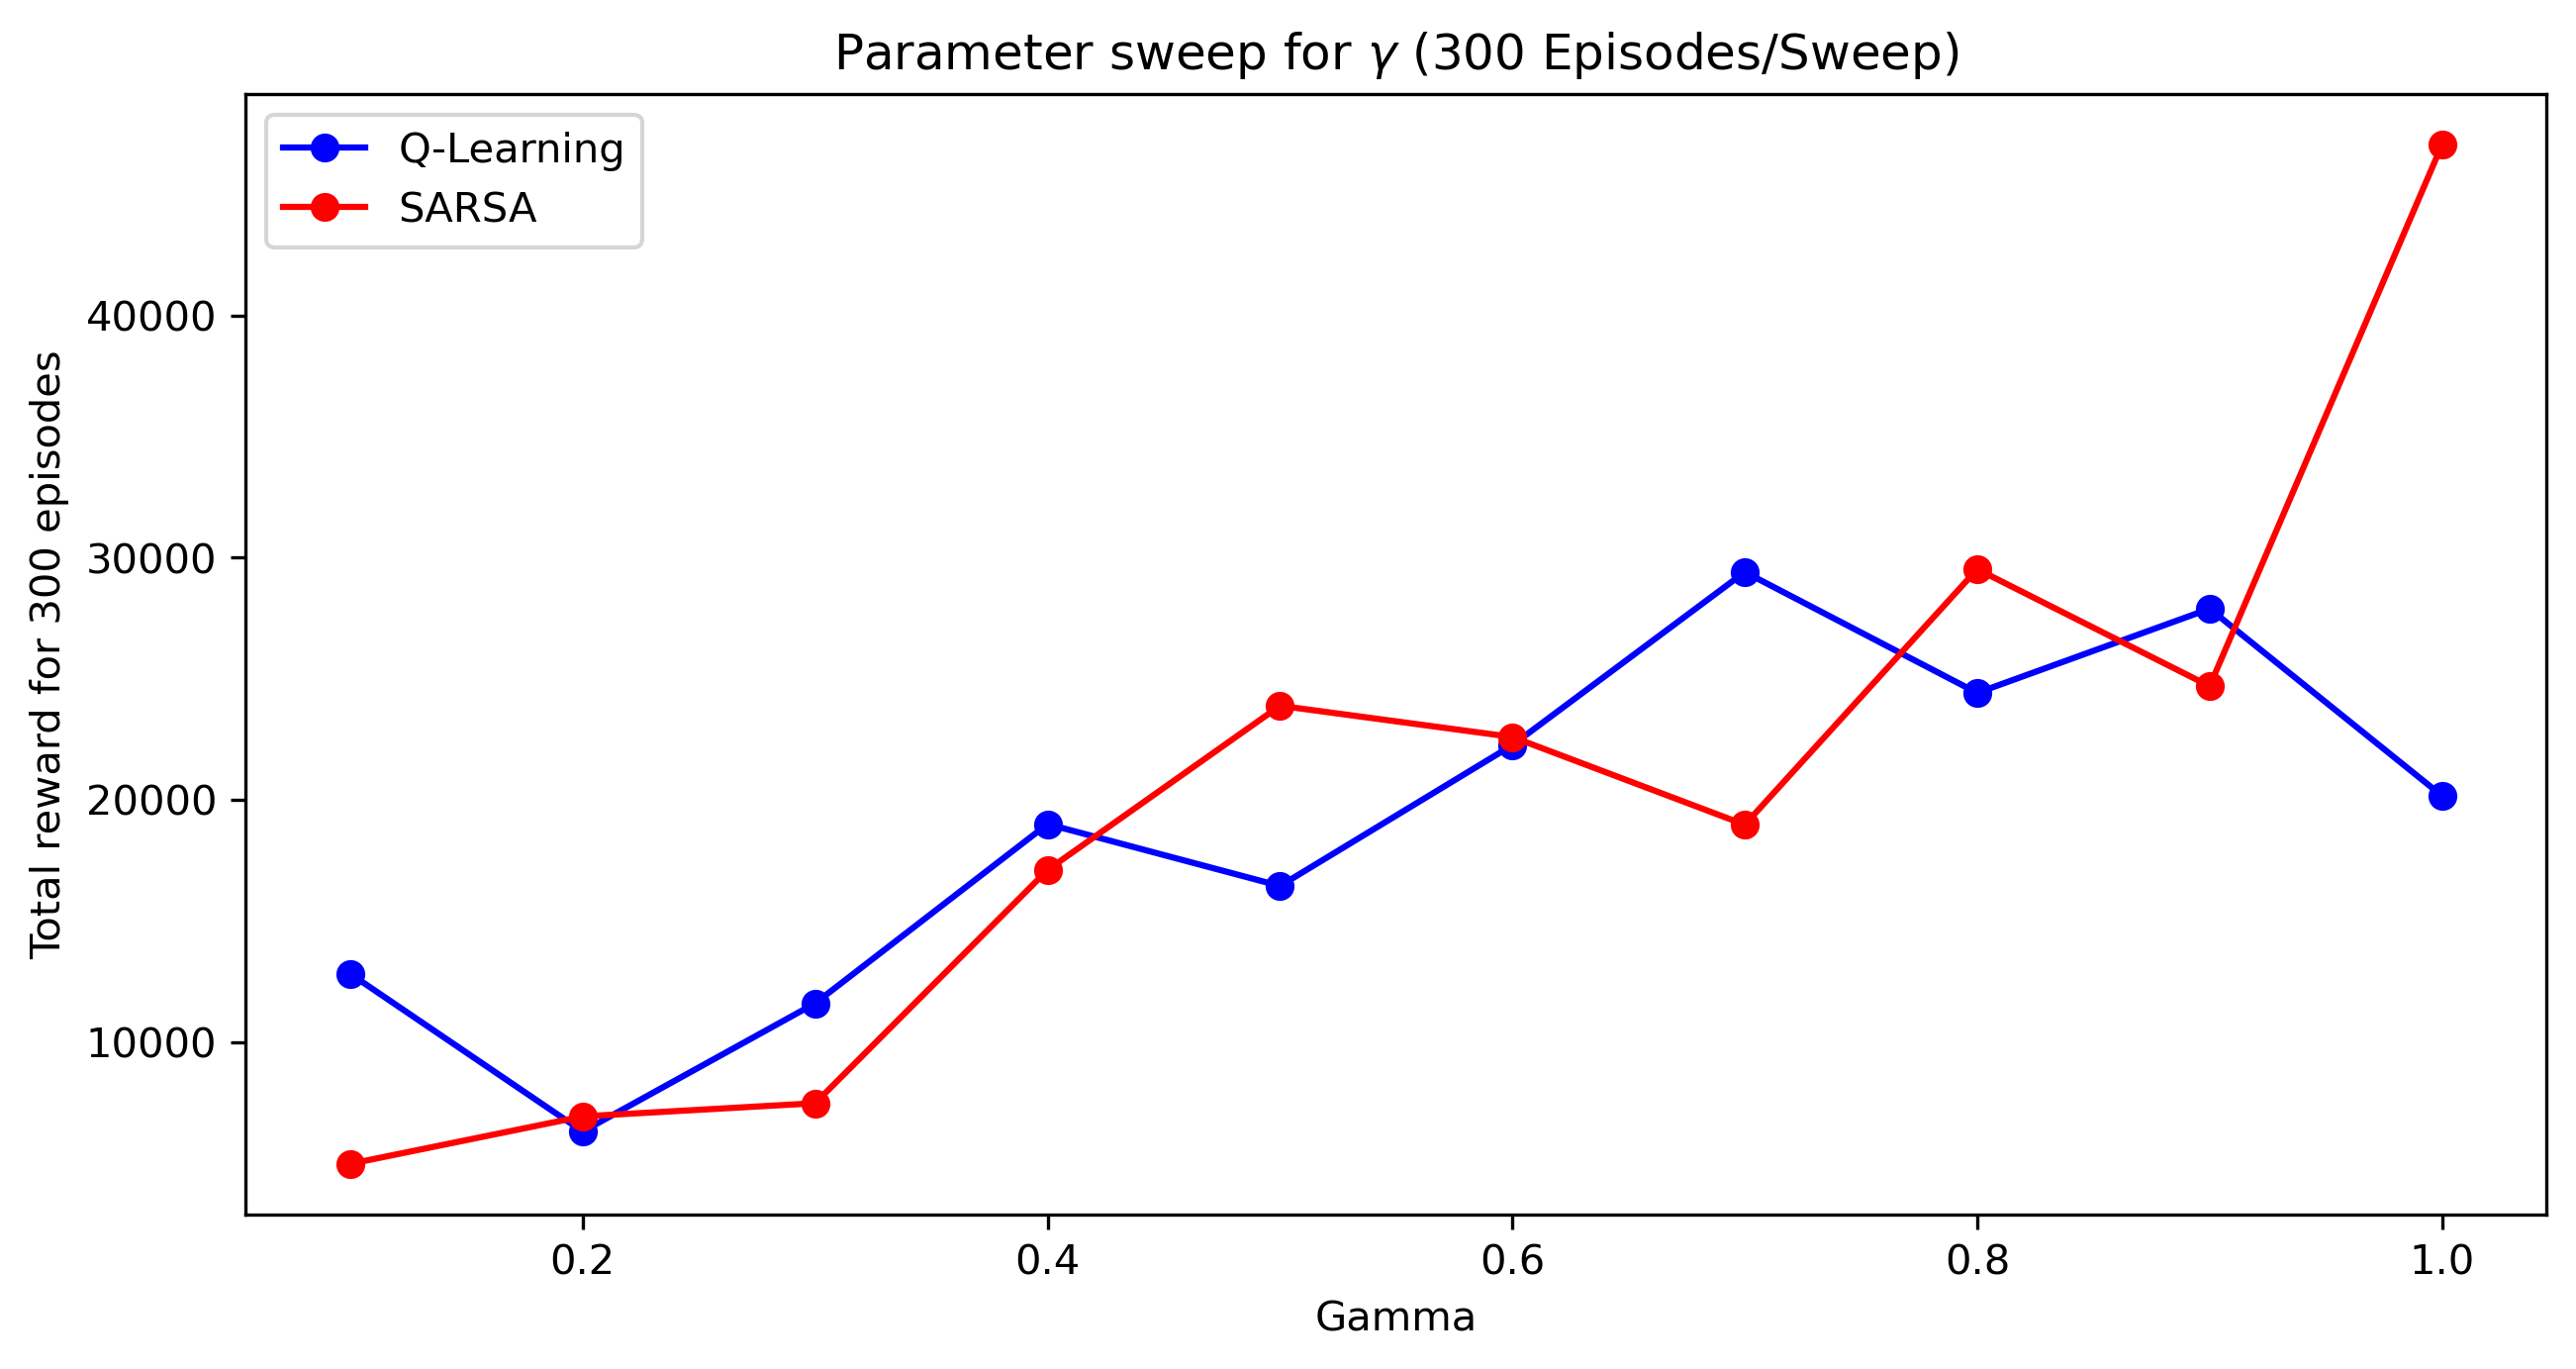

In [94]:
plt.figure(figsize=(10,5),dpi=300)
plt.plot(ps_g['Gamma_QLearning'],"-o",color='blue')
plt.plot(ps_g['Gamma_SARSA'],"-o",color='red')
plt.xlabel('Gamma')
plt.ylabel('Total reward for 300 episodes')
plt.title('Parameter sweep for $\\gamma$ (300 Episodes/Sweep)')
plt.legend(['Q-Learning','SARSA'])
plt.savefig('ps_gamma.png')